<br>
<h2 style = "font-size:40px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Cement Manufacturing Project</h2> 
<br>

<p style = "font-size:30px; color: #007580 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> Here are my other notebooks, please have a look and definitely you will find it useful. Happy reading :)</strong></p>
<ol>
<li><a href ="https://www.kaggle.com/vinayakshanawad/industrial-safety-complete-solution">Industrial Safety - Complete Solution</a></li>
<li><a href ="https://www.kaggle.com/vinayakshanawad/eda-statistical-analysis-hypothesis-testing">EDA - Statistical Analysis - Hypothesis Testing</a></li>
</ol>

<a id = '0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #007580; color : #fed049; border-radius: 5px 5px; text-align:center; font-weight: bold" >Table of Contents</h2> 

1. [Overview](#1.0)
2. [Import the necessary libraries](#2.0)
3. [Data Collection](#3.0)
4. [Data Cleaning](#4.0)
	- [4.1 Check Duplicates](#4.1)
	- [4.2 Drop Duplicates](#4.2)
	- [4.3 Check Outliers](#4.3)
	- [4.4 Working with Outliers: Correcting, Removing](#4.4)
	- [4.5 Check Outliers after correction](#4.5)
	- [4.6 Check Missing Values](#4.6)
5. [EDA (Data Analysis and Preparation)](#5.0)
	- [5.1 Variable Identification](#5.1)
	- [5.2 Univariate Analysis](#5.2)
	- [5.3 Study Summary Statistics](#5.3)
	- [5.4 Multivariate Analysis](#5.4)
	- [5.5 Study Correlation](#5.5)
	- [5.6 EDA (Exploratory Data Analysis) Summary](#5.6)
6. [Feature Engineering](#6.0)
	- [6.1 Variable Creation](#6.1)
7. [Model Building and Validation](#7.0)
	- [7.1 Sampling Techniques - Create Training and Test Set](#7.1)
	- [7.2 Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help](#7.2)
	- [7.3 Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and presenting my findings in terms of the independent attributes and their suitability to predict strength](#7.3)
	- [7.4 Overall Summary - Before feature selection](#7.4)
8. [Feature Selection Methods](#8.0)
	- [8.1 Feature Importance](#8.1)
	- [8.2 Overall summary - after feature selection](#8.2)
	- [8.3 Comparison of with and without feature selection methods](#8.3)
9. [Optimization](#9.0)
	- [9.1 Hyper Parameter Tuning](#9.1)
	- [9.2 Bootstrap Sampling - Model performance range at 95% confidence level](#9.2)
10. [Conclusion](#10.0)

<a id = '1.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 1. Overview </h2> 

### Data Description:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

### Domain:

Cement manufacturing

### Context

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

### Attribute Information:
    
* **Cement** : measured in kg in a m3 mixture
* **Blast** : measured in kg in a m3 mixture
* **Fly ash** : measured in kg in a m3 mixture
* **Water** : measured in kg in a m3 mixture
* **Superplasticizer** : measured in kg in a m3 mixture
* **Coarse Aggregate** : measured in kg in a m3 mixture
* **Fine Aggregate** : measured in kg in a m3 mixture
* **Age** : day (1~365)
* **Concrete compressive strength** measured in MPa

### Objective

**Modeling of strength of high performance concrete using Machine Learning.**

<a id = '2.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 2. Import the necessary libraries </h2> 

In [1]:
#pip install catboost --no-cache-dir

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import itertools

import time

# used to supress display of warnings
import warnings

# ols library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import missingno as mno
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

# import zscore for scaling the data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# pre-processing methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import TransformedTargetRegressor

# the regression models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

from sklearn.pipeline import Pipeline

# feature-selection methods
from sklearn.feature_selection import SelectFromModel

# bootstrap sampling
from sklearn.utils import resample

ModuleNotFoundError: No module named 'statsmodels'

#### Setting Options

In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

<a id = '3.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 3. Data Collection </h2> 

In [4]:
# Reading Concrete data
concrete_df = pd.read_csv("./dataset/concrete.csv")

In [5]:
# Get the top 5 rows
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3000000,212.0000000,0.0000000,203.5000000,0.0000000,971.8000000,748.5000000,28,29.8900000
1,168.9000000,42.2000000,124.3000000,158.3000000,10.8000000,1080.8000000,796.2000000,14,23.5100000
2,250.0000000,0.0000000,95.7000000,187.4000000,5.5000000,956.9000000,861.2000000,28,29.2200000
3,266.0000000,114.0000000,0.0000000,228.0000000,0.0000000,932.0000000,670.0000000,28,45.8500000
4,154.8000000,183.4000000,0.0000000,193.3000000,9.1000000,1047.4000000,696.7000000,28,18.2900000


<p style = "font-size:20px; color: #007580 "><strong> Shape of the data </strong></p> 

In [6]:
# Get the shape of Concrete data
concrete_df.shape

(1030, 9)

In [7]:
print("Number of rows = {0} and Number of Columns = {1} in Data frame".format(concrete_df.shape[0],concrete_df.shape[1]))

Number of rows = 1030 and Number of Columns = 9 in Data frame


<p style = "font-size:20px; color: #007580 "><strong> Data type of each attribute </strong></p> 

In [8]:
# Check datatypes
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

#### From the above output, we see that except for the column 'age' all our columns datatype is float64.

#### The data has 8 quantitative input variables and 1 quantitative output variable - Strength

In [9]:
# Check Data frame info
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
# Column names of Data frame
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

<a id = '4.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 4. Data Cleaning </h2> 

<a id = '4.1'></a>
<p style = "font-size:20px; color: #007580 "><strong> 4.1 Check Duplicates </strong></p> 

In [11]:
# Check duplicates in a data frame
concrete_df.duplicated().sum()

25

In [12]:
# View the duplicate records
duplicates = concrete_df.duplicated()

concrete_df[duplicates]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,3,33.4000000
298,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,3,33.4000000
400,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,3,35.3000000
420,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,3,35.3000000
463,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,56,77.3000000
468,252.0000000,0.0000000,0.0000000,185.0000000,0.0000000,1111.0000000,784.0000000,28,19.6900000
482,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,91,65.2000000
493,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,91,79.3000000
517,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,56,64.3000000
525,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,28,71.3000000


#### There is no need to worry about preserving the data; it is already a part of the concrete dataset and we can merely remove or drop these rows from your cleaned data

<a id = '4.2'></a>
<p style = "font-size:20px; color: #007580 "><strong> 4.2 Drop Duplicates </strong></p> 

In [13]:
# Delete duplicate rows
concrete_df.drop_duplicates(inplace=True)

In [14]:
# Get the shape of Concrete data
concrete_df.shape

(1005, 9)

<a id = '4.3'></a>
<p style = "font-size:20px; color: #007580 "><strong> 4.3 Check Outliers </strong></p> 

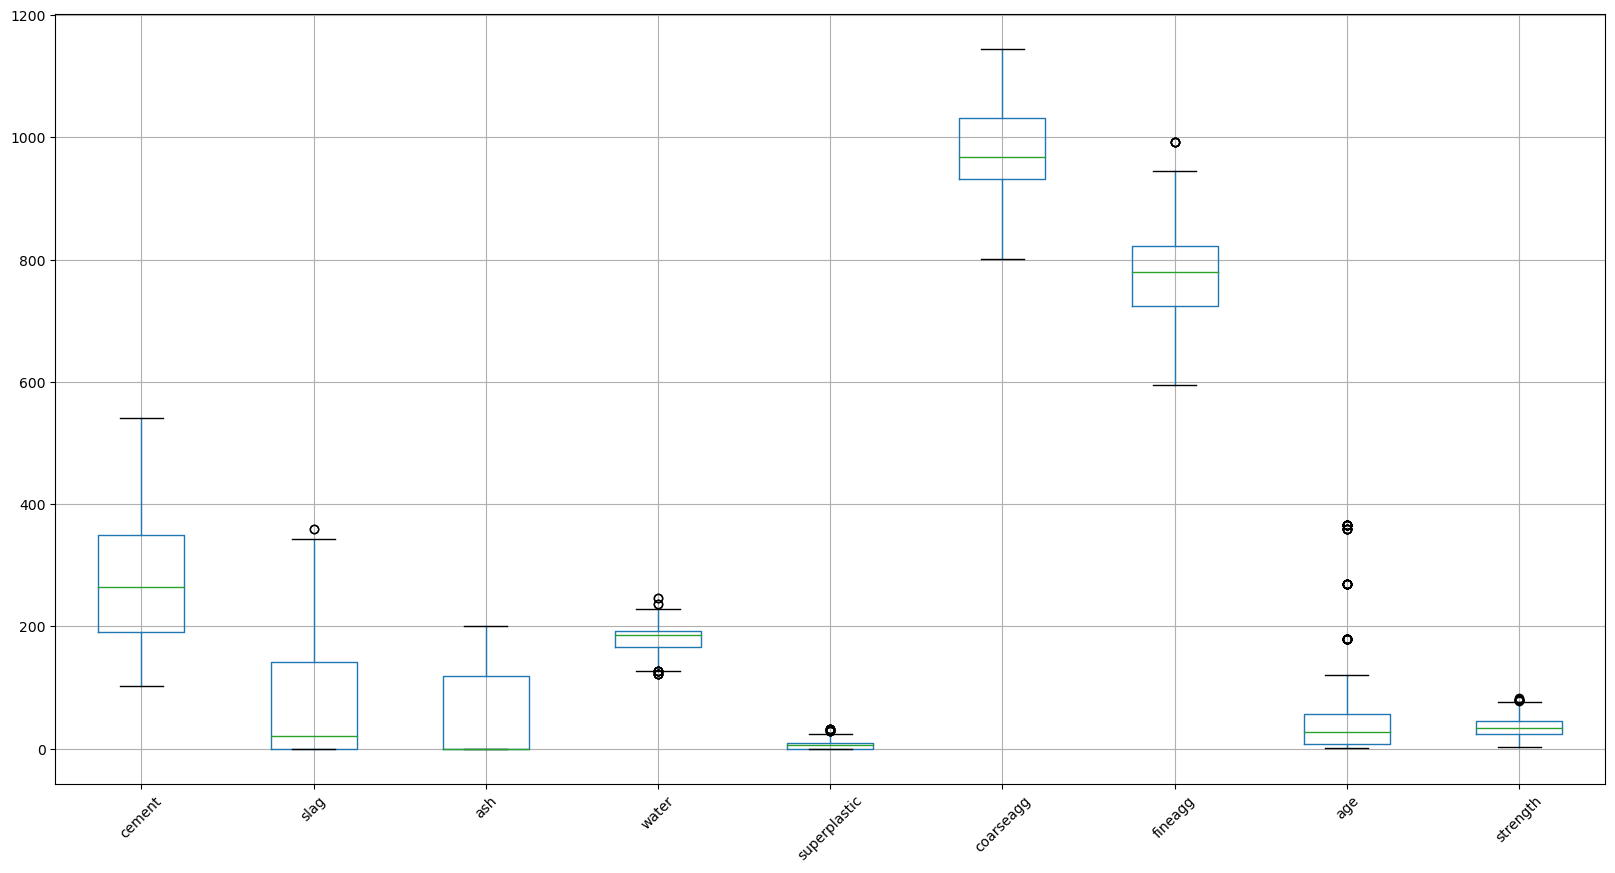

In [15]:
# Create a boxplot for all the continuous features
concrete_df.boxplot(column = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], rot=45, figsize = (20,10));

* **Looking at the plot above; Stag, Water, Superplastic, Fineagg, Age and Strength columns have outliers and we need to treat those outliers.**

<a id = '4.4'></a>
<p style = "font-size:20px; color: #007580 "><strong> 4.4 Working with Outliers: Correcting, Removing </strong></p> 

In [16]:
concrete_df_outliers = pd.DataFrame(concrete_df.loc[:,])

# Calculate IQR
Q1 = concrete_df_outliers.quantile(0.25)
Q3 = concrete_df_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

cement         158.3000000
slag           142.5000000
ash            118.3000000
water           26.3000000
superplastic    10.0000000
coarseagg       99.0000000
fineagg         97.9000000
age             49.0000000
strength        21.3500000
dtype: float64


**Note:** The **first array contains the list of row numbers** and **second array respective column numbers** in concrete_df_outliers data frame

In [17]:
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [18]:
# We can use IQR score to filter out the outliers by keeping only valid values

# Replace every outlier on the upper side by the upper whisker - for 'water', 'superplastic', 
# 'fineagg', 'age' and 'strength' columns
for i, j in zip(np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[0], np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]
    
# Replace every outlier on the lower side by the lower whisker - for 'water' column
for i, j in zip(np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[0], np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]

In [19]:
# Remove outliers columns - 'water', 'superplastic', 'fineagg', 'age', 'water' and 'strength'
concrete_df.drop(columns = concrete_df.loc[:,], inplace = True)

In [20]:
# Add 'water', 'superplastic', 'fineagg', 'age', 'water' and 'strength' with no outliers from concrete_df_outliers to 
# concrete_df
concrete_df = pd.concat([concrete_df, concrete_df_outliers], axis = 1)

<a id = '4.5'></a>
<p style = "font-size:20px; color: #007580 "><strong> 4.5 Check Outliers after correction </strong></p> 

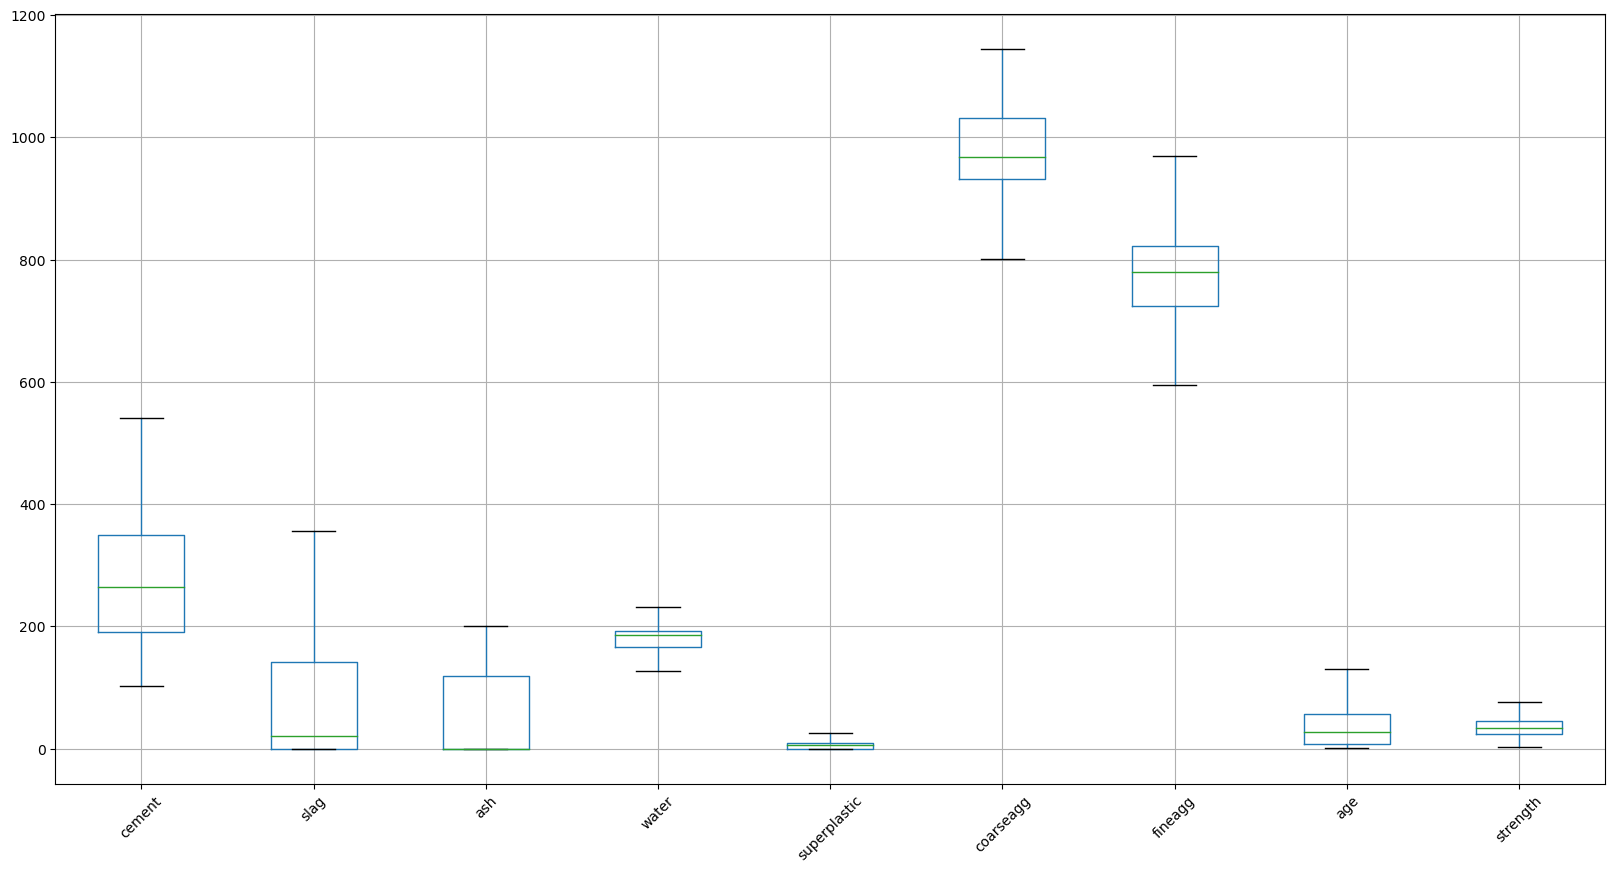

In [21]:
# Create a boxplot for all the continuous features
concrete_df.boxplot(column = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], rot=45, figsize = (20,10));

* **Looking at the above plot, there are no more outliers in concrete data set**

<a id = '4.6'></a>
<p style = "font-size:20px; color: #007580 "><strong> 4.6 Check Missing Values </strong></p> 

In [22]:
# Check the presence of missing values
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [23]:
# Check the presence of missing values
concrete_df_missval = concrete_df.copy()   # Make a copy of the dataframe
isduplicates = False

for x in concrete_df_missval.columns:
    concrete_df_missval[x] = concrete_df_missval[x].astype(str).str.replace(".", "")
    result = concrete_df_missval[x].astype(str).str.isalnum() # Check whether all characters are alphanumeric
    if False in result.unique():
        isduplicates = True
        print('For column "{}" unique values are {}'.format(x, concrete_df_missval[x].unique()))
        print('\n')
        
if not isduplicates:
    print('No duplicates in this dataset')

No duplicates in this dataset


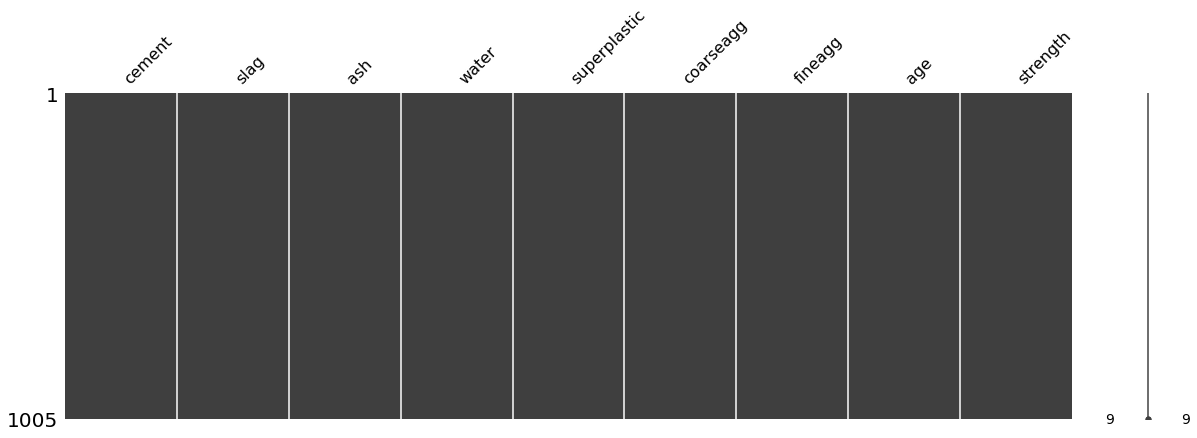

In [24]:
# Visualize missing values
mno.matrix(concrete_df, figsize = (20, 6));

In [25]:
# Summary statistics
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0000000,278.6313433,104.3442607,102.0000000,190.7000000,265.0000000,349.0000000,540.0000000
slag,1005.0000000,72.0372139,86.1499938,0.0000000,0.0000000,20.0000000,142.5000000,356.2500000
ash,1005.0000000,55.5363184,64.2079686,0.0000000,0.0000000,0.0000000,118.3000000,200.1000000
water,1005.0000000,182.0668159,21.1586448,127.1500000,166.6000000,185.7000000,192.9000000,232.3500000
superplastic,1005.0000000,5.9814925,5.7244631,0.0000000,0.0000000,6.1000000,10.0000000,25.0000000
coarseagg,1005.0000000,974.3768159,77.5796667,801.0000000,932.0000000,968.0000000,1031.0000000,1145.0000000
fineagg,1005.0000000,772.5710945,80.0359343,594.0000000,724.3000000,780.0000000,822.2000000,969.0500000
age,1005.0000000,38.0761194,35.8625492,1.0000000,7.0000000,28.0000000,56.0000000,129.5000000
strength,1005.0000000,35.2263184,16.2202533,2.3300000,23.5200000,33.8000000,44.8700000,76.8950000


<a id = '4.7'></a>
<p style = "font-size:20px; color: #007580 "><strong> 4.7 Data Cleaning Summary </strong></p> 

1. We had 25 duplicate instances in dataset and dropped those duplicates.
2. We had outliers in 'Water', 'Superplastic', 'Fineagg', 'Age' and 'Strength' column also, handled these outliers by replacing every outlier with upper side of the whisker.
3. We had outliers in 'Water' column also, handled these outliers by replacing every outlier with lower side of the whisker.
4. No missing values in dataset.

<a id = '5.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 5. EDA (Data Analysis and Preparation) </h2> 

<a id = '5.1'></a>
<p style = "font-size:20px; color: #007580 "><strong> 5.1 Variable Identification </strong></p> 

* **Target variable:** 'Strength'
* **Predictors (Input varibles):** 'Cement', 'Slag', 'Ash', 'Water', 'Superplastic', 'Coarseagg', 'Fineagg', 'Age'

<a id = '5.2'></a>
<p style = "font-size:20px; color: #007580 "><strong> 5.2 Univariate Analysis </strong></p> 

#### Numerical columns - 'Cement', 'Slag', 'Ash', 'Water', 'Superplastic', 'Coarseagg', 'Fineagg', 'Age' and 'Strength'

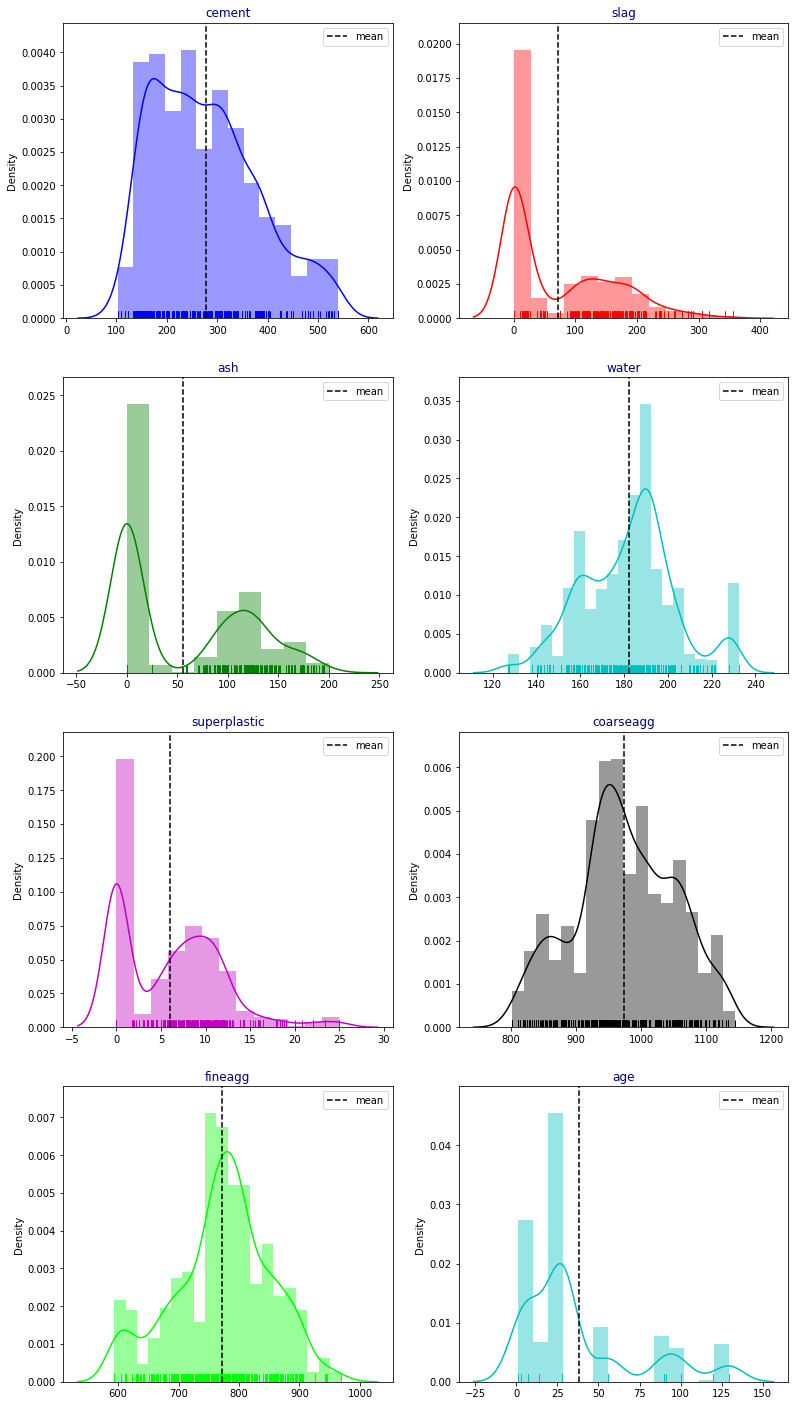

In [26]:
cols = [i for i in concrete_df.columns if i not in 'strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(concrete_df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(concrete_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

In [27]:
#for x in concrete_df:
    #sns.distplot(concrete_df[x]);
    #plt.title("{} distribution".format(x))
    #plt.show()    

**Univariate analysis:**
* **Cement column - Right skewed distribution -- cement is skewed to higher values**
* **Slag column - Right skewed distribution -- slag is skewed to higher values and there are two gaussians**
* **Ash column - Right skewed distribution -- ash is skewed to higher values and there are two gaussians**
* **Water column - Moderately left skewed distribution**
* **Superplastic column - Right skewed distribution -- superplastic is skewed to higher values and there are two gaussians**
* **Coarseagg column - Moderately left skewed distribution**
* **Fineagg column - Moderately left skewed distribution**
* **Age column - Right skewed distribution -- age is skewed to higher values and there are five gaussians**

#### Concrete compressive strength distribution

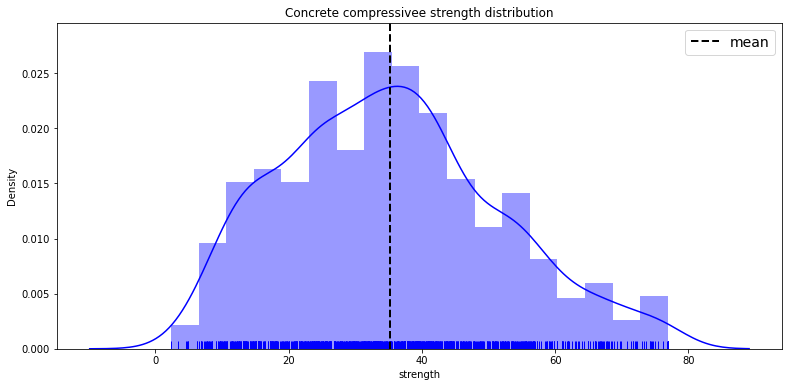

In [28]:
plt.figure(figsize=(13,6))
sns.distplot(concrete_df["strength"],color="b",rug=True)
plt.axvline(concrete_df["strength"].mean(), linestyle="dashed",color="k", label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Concrete compressivee strength distribution")
plt.show()

* **Strength column seems to be uniformly distributed**

<a id = '5.3'></a>
<p style = "font-size:20px; color: #007580 "><strong> 5.3 Study Summary Statistics </strong></p> 

In [29]:
# Summary statistics
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0000000,278.6313433,104.3442607,102.0000000,190.7000000,265.0000000,349.0000000,540.0000000
slag,1005.0000000,72.0372139,86.1499938,0.0000000,0.0000000,20.0000000,142.5000000,356.2500000
ash,1005.0000000,55.5363184,64.2079686,0.0000000,0.0000000,0.0000000,118.3000000,200.1000000
water,1005.0000000,182.0668159,21.1586448,127.1500000,166.6000000,185.7000000,192.9000000,232.3500000
superplastic,1005.0000000,5.9814925,5.7244631,0.0000000,0.0000000,6.1000000,10.0000000,25.0000000
coarseagg,1005.0000000,974.3768159,77.5796667,801.0000000,932.0000000,968.0000000,1031.0000000,1145.0000000
fineagg,1005.0000000,772.5710945,80.0359343,594.0000000,724.3000000,780.0000000,822.2000000,969.0500000
age,1005.0000000,38.0761194,35.8625492,1.0000000,7.0000000,28.0000000,56.0000000,129.5000000
strength,1005.0000000,35.2263184,16.2202533,2.3300000,23.5200000,33.8000000,44.8700000,76.8950000


* **The above output prints the important summary statistics of all the numeric variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation.**

* **cement column - Right skewed distribution -- cement is skewed to higher values**
* **slag column - Right skewed distribution -- slag is skewed to higher values and there are two gaussians**
* **ash column - Right skewed distribution -- ash is skewed to higher values and there are two gaussians**
* **water column - Moderately left skewed distribution**
* **superplastic column - Right skewed distribution -- superplastic is skewed to higher values and there are two gaussians**
* **coarseagg column - Moderately left skewed distribution**
* **fineagg column - Moderately left skewed distribution**
* **age column - Right skewed distribution -- age is skewed to higher values and there are five gaussians**
* **strength column - Moderately right skewed distribution**

<a id = '5.4'></a>
<p style = "font-size:20px; color: #007580 "><strong> 5.4 Multivariate Analysis </strong></p> 

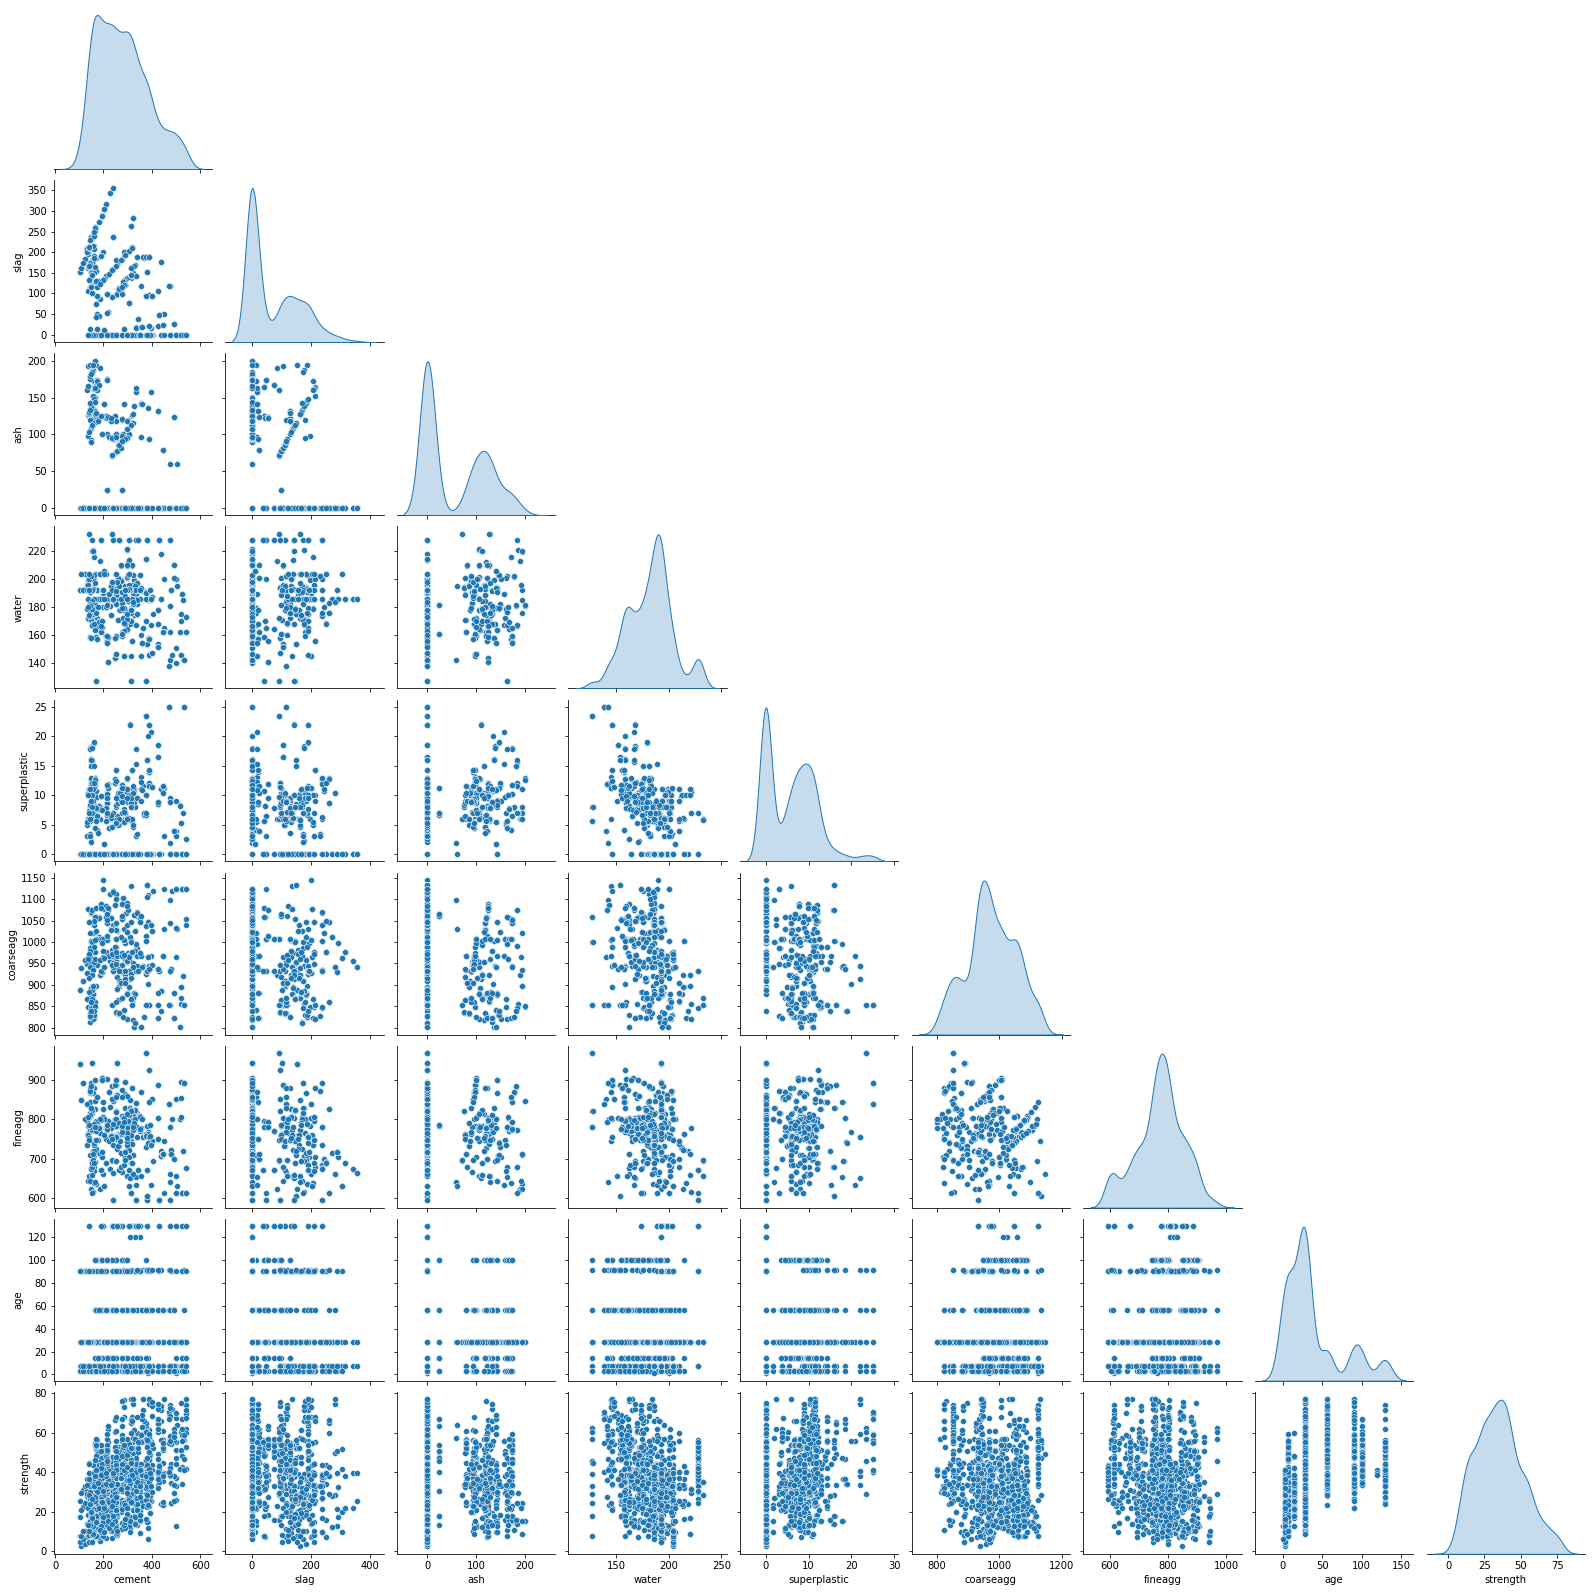

In [30]:
sns.pairplot(concrete_df, diag_kind = 'kde', corner = True);

#### Diagonals Analysis

* If we look at KDE diagonal plots, there are at least 2 Gaussians (2 peaks) in Slag, Ash, Superplastic and Age, even though it's not unsupervised learning but in this dataset there are at least 2 clusters and there may be more.

* Range of clusters in this dataset is 2 to 6.

* The diagonal analysis give same insights as we got from univariate analysis.

#### Off Diagonal Analysis: Relationship between indpendent attributes
##### Scatter plots

* Cement vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* Slag vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* Ash vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* Water vs other independent attributes: This attribute have negative curvy-linear relationship with Fineagg, Coarseagg and Superplastic, as Water content increases means Fineagg, Coarseagg and Superplastic are reducing. It does not have any significant relationship with other independent atributes.

* Superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.

* Coarseagg vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* Fineagg vs other independent attributes: It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.


#### Strength attribute : Relationship between dependent and independent attributes

* Strength vs Cement: It is having curvy-linear relationship with concrete cement and it is good predictor of concrete strength.
* Strength vs Slag: It is having very weak relationship with concrete slag because there are cloud of points(rectangular shape).
* Strength vs Ash: It is having weak relationship with concrete ash because there are cloud of points(rectangular shape).
* Strength vs Water: It is having curvy-linear relationship with water and it is good predictor of concrete strength.
* Strength vs Superplastic: It is having weak relationship with superplastic because there are cloud of points(ballon shape) and it might be a good predictor of concrete strength..
* Strength vs Coarseagg: It is having very weak relationship with concrete coarseagg because there are cloud of points(rectangular shape).
* Strength vs Fineagg: It is having very weak relationship with concrete fineagg because there are cloud of points(rectangular shape).
* Strength vs Age: It is having curvy-linear relationship with concrete age and it might be a good predictor of concrete strength.


* **Finally Cement, Water, Superplastic and Age can be good predictors of concrete strength.**

<a id = '5.5'></a>
<p style = "font-size:20px; color: #007580 "><strong> 5.5 Study Correlation </strong></p> 

In [31]:
# Check the Correlation
concrete_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.0000000,-0.3033700,-0.3856098,-0.0572088,0.0448168,-0.0862053,-0.2476623,0.0556490,0.4886896
slag,-0.3033700,1.0000000,-0.3123648,0.1302267,0.0196023,-0.2775952,-0.2911288,-0.0546345,0.1024400
ash,-0.3856098,-0.3123648,1.0000000,-0.2845415,0.4361848,-0.0264685,0.0918726,-0.0946261,-0.0796849
water,-0.0572088,0.1302267,-0.2845415,1.0000000,-0.6560121,-0.2103993,-0.4441919,0.1945588,-0.2713811
superplastic,0.0448168,0.0196023,0.4361848,-0.6560121,1.0000000,-0.2357154,0.2019397,-0.1275331,0.3429833
coarseagg,-0.0862053,-0.2775952,-0.0264685,-0.2103993,-0.2357154,1.0000000,-0.1604944,0.0127844,-0.1457945
fineagg,-0.2476623,-0.2911288,0.0918726,-0.4441919,0.2019397,-0.1604944,1.0000000,-0.0979334,-0.1885092
age,0.0556490,-0.0546345,-0.0946261,0.1945588,-0.1275331,0.0127844,-0.0979334,1.0000000,0.4767263
strength,0.4886896,0.1024400,-0.0796849,-0.2713811,0.3429833,-0.1457945,-0.1885092,0.4767263,1.0000000


#### Pairplot for checking the Correlation

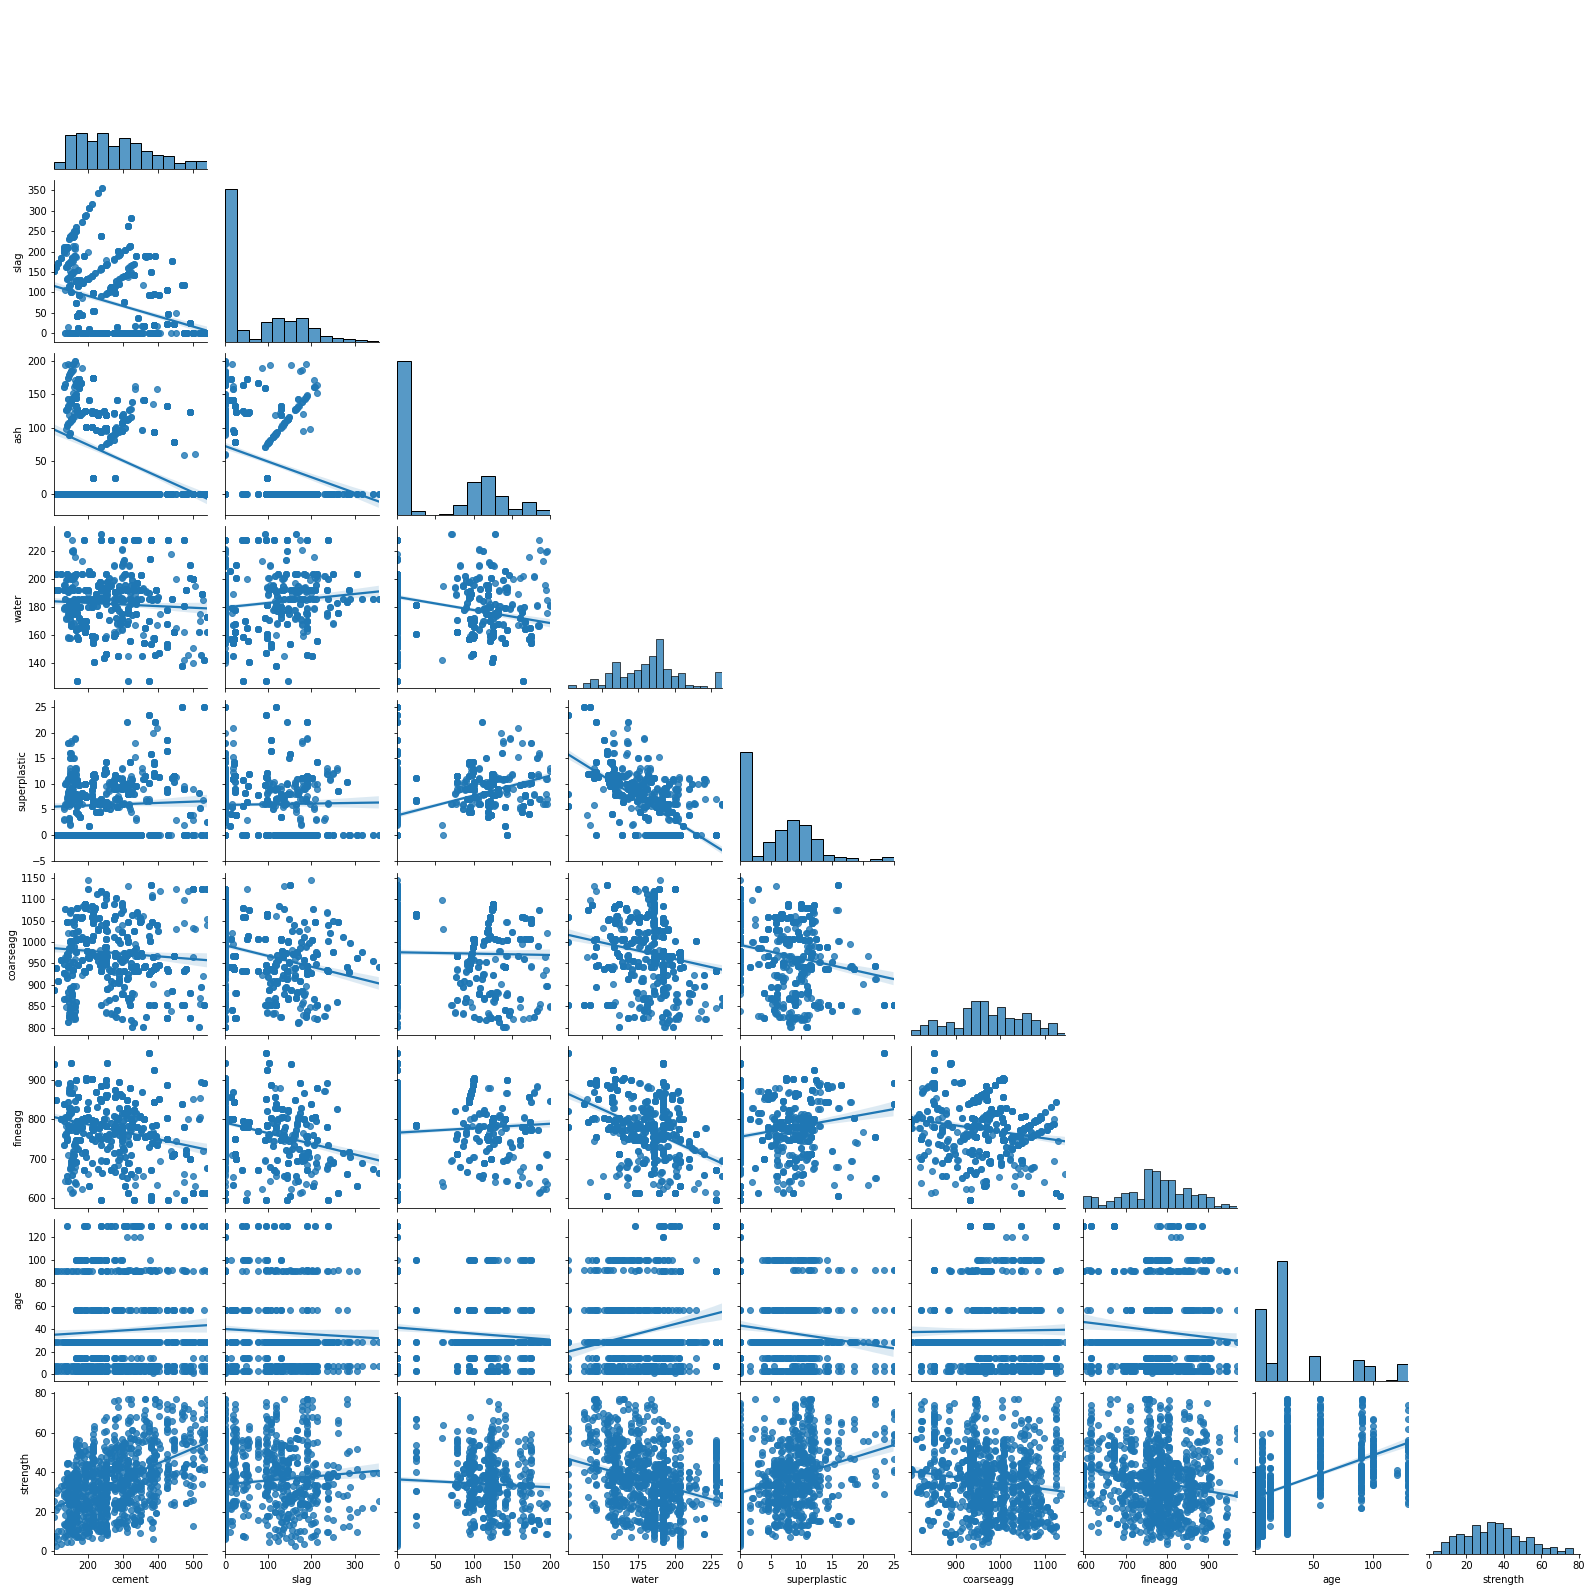

In [32]:
sns.pairplot(concrete_df[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength']], kind = 'reg', corner = True);

#### Heatmap for checking the Correlation

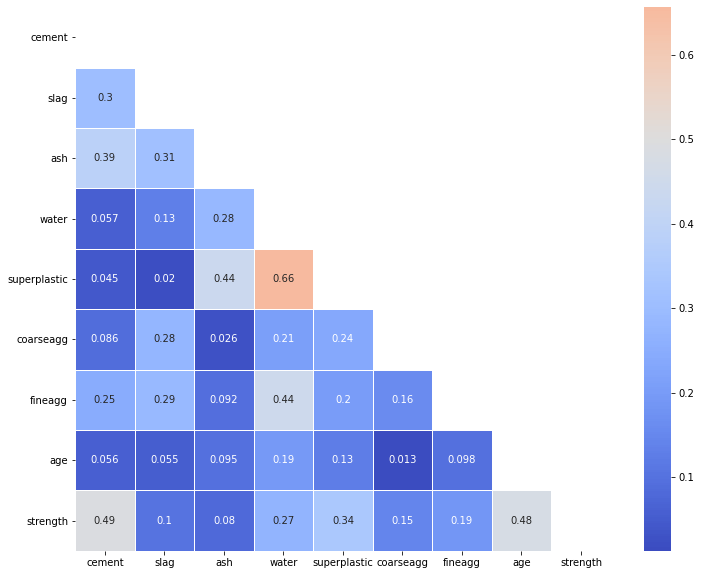

In [33]:
corr = abs(concrete_df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.show()

#### Observations:

* **Looking at the Correlation table; 'Cement', 'Water', 'Superplastic' and 'Age' features are influencing the concrete strength.**


* **Concrete strength feature is having Moderate Positive Correlation with Cement feature.**
* **Concrete strength feature is having Low Positive Correlation with Superplastic and Age features**
* **Concrete strength feature is having Low Positive Correlation with Water features**
* **Concrete strength feature is having negligible Correlation with Slag, Ash, Coarseagg and Fineagg features**


* **Water feature is having Moderate Positive Correlation with Superplastic feature**


* **Concrete cement feature is having Low Positive Correlation with Slag and Ash features**


* **Concrete fineagg feature is having Low Positive Correlation with Water feature**

* **Concrete ash feature is having Low Positive Correlation with Superplastic feature**

<a id = '5.6'></a>
<p style = "font-size:20px; color: #007580 "><strong> 5.6 EDA (Exploratory Data Analysis) Summary </strong></p> 

1. Except 'Cement', 'Water', 'Superplastic' and 'Age' features, all other features are having very weak relationship with concrete 'Strength' feature and does not account for making statistical decision (of correlation).

2. Concrete Cement feature is having Low Positive Correlation with Slag and Ash features, perhaps we can create additional features like (cement + slag) and (cement + ash) to predict the concrete strength.

3. Concrete Fineagg feature is having Low Positive Correlation with Water feature, perhaps we can create additional features like  (water + fineagg) to predict the concrete strength.

4. Concrete Ash feature is having Low Positive Correlation with Superplastic feature, perhaps we can create additional features like  (ash + Superplastic) to predict the concrete strength.

5. Range of clusters in this dataset is 2 to 6.

<a id = '6.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 6. Feature Engineering </h2> 

<a id = '6.1'></a>
<p style = "font-size:20px; color: #007580 "><strong> 6.1 Variable Creation </strong></p> 

### Identify opportunities (if any) to create a composite feature, drop a feature etc.

* As mentioned in EDA summary.

**Independent features are influencing concrete strength - 'Cement', 'Water', 'Superplastic' and 'Age'**

**Composite features are influencing concrete strength - cement + slag, cement + ash and water + fineagg. We can create these composite featues because these features are having some relationship within them.** 

**Note: Before concluding anything we can try with feature selection methods and then compare the resutls.**

<a id = '7.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 7. Model Building and Validation </h2> 

In [34]:
import matplotlib.gridspec as gridspec

# sns styling figures
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

<a id = '7.1'></a>
<p style = "font-size:20px; color: #007580 "><strong> 7.1 Sampling Techniques - Create Training and Test Set </strong></p> 

In [35]:
X = concrete_df.drop(['strength'], axis = 1) # Considering all Predictors
y = concrete_df['strength']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [37]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (703,8)
y_train shape : (703,)
X_test shape : (302,8)
y_test shape : (302,)


<a id = '7.2'></a>
<p style = "font-size:20px; color: #007580 "><strong> 7.2 Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help </strong></p> 

<p style = "font-size:20px; color: #007580 "><strong> Train and test model </strong></p> 

In [38]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale):
    
    print (model)
    print ("***************************************************************************")
    
    if scale == 'yes':
        # prepare the model with input scaling
        pipeline = Pipeline([('scaler', PowerTransformer()), ('model', model)])
    elif scale == 'no':
        # prepare the model with input scaling
        pipeline = Pipeline([('model', model)])

    pipeline.fit(X_train, y_train) # Fit the model on Training set
    prediction = pipeline.predict(X_test) # Predict on Test set

    r2 = metrics.r2_score(y_test, prediction) # Calculate the r squared value on the Test set
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction)) # Root mean squared error
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))
    
    # Accuracy of Training data set
    train_accuracy_score = pipeline.score(X_train, y_train)
    
    # Accuracy of Test data set
    test_accuracy_score = pipeline.score(X_test, y_test)
    
    print ("***************************************************************************")
    
    if of_type == "coef":
        
        # FEATURE IMPORTANCES plot
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        print(model.coef_)
        coef = pd.DataFrame(np.sort(model.coef_)[::-1].ravel())
        coef["feat"] = X_train.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r", linewidth=2)
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title(method + ' ' + 'FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        
        # FEATURE IMPORTANCES plot
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        coef = pd.DataFrame(np.sort(model.feature_importances_)[::-1])
        coef["feat"] = X_train.columns
        ax2 = sns.barplot(coef["feat"], coef[0],palette="jet_r", linewidth=2)
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title(method + ' ' + 'FEATURE IMPORTANCES')
    
    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'R Squared': r2, 'RMSE': rmse, 'Train Accuracy': train_accuracy_score, 
                              'Test Accuracy': test_accuracy_score}, index=[index])
    
    return resultsDf  # return all the metrics along with predictions

<p style = "font-size:20px; color: #007580 "><strong> Train and test all models </strong></p> 

In [39]:
def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):
    # define regressor models
    models=[['LinearRegression',LinearRegression()],
        ['Ridge',Ridge(random_state = 1)],
        ['Lasso',Lasso(random_state = 1)],
        ['KNeighborsRegressor',KNeighborsRegressor(n_neighbors = 3)],
        ['SVR',SVR(kernel = 'linear')],
        ['RandomForestRegressor',RandomForestRegressor(random_state = 1)],
        ['BaggingRegressor',BaggingRegressor(random_state = 1)],
        ['ExtraTreesRegressor',ExtraTreesRegressor(random_state = 1)],
        ['AdaBoostRegressor',AdaBoostRegressor(random_state = 1)],
        ['GradientBoostingRegressor',GradientBoostingRegressor(random_state = 1)],
        ['CatBoostRegressor',CatBoostRegressor(random_state = 1, verbose=False)],
        ['XGBRegressor',XGBRegressor()]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, regressor in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(regressor, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale)

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common

<p style = "font-size:20px; color: #007580 "><strong> Model with Hyperparameter Tuning </strong></p> 

In [40]:
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    start = time.time()  # note the start time 
    
    # define grid search
    cv = KFold(n_splits=10, random_state=1)
    #grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                     #scoring = 'neg_root_mean_squared_error', error_score=0)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                     scoring = 'neg_root_mean_squared_error', error_score=0)
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print(name, "- Least: RMSE %f using %s" % (model_grid_result.best_score_ * (-1), model_grid_result.best_params_))
    
    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_

<p style = "font-size:20px; color: #007580 "><strong> Modelling - Linear Regression </strong></p> 

In [41]:
# Building a Linear Regression model
lr = LinearRegression()
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'LinearRegression', X_train, X_test, y_train, y_test, 'none', 1, 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf

LinearRegression()
***************************************************************************
***************************************************************************


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100


**Observation: This model performs better on training set and poorly on test set which shows that it's an overfitting and very complex model.**



<p style = "font-size:20px; color: #007580 "><strong> Linear Regression using Statsmodels </strong></p> 

In [42]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2

# OLS library expects the X and y to be given in one single dataframe
concrete_df_train = pd.concat([X_train, y_train], axis=1)
concrete_df_train.head()

lr_ols = smf.ols(formula= 'strength ~ cement + slag + ash + water + superplastic + coarseagg + fineagg + age', 
              data = concrete_df_train).fit()

print(lr_ols.summary())  # Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     240.8
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          1.64e-194
Time:                        15:30:13   Log-Likelihood:                -2504.8
No. Observations:                 703   AIC:                             5028.
Df Residuals:                     694   BIC:                             5069.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.8322     26.312     -0.564   

**Model Statistical Outputs:**

* R-squared and Adj. R-squared are very close, it is sign that all predictors are relevant to the overall model.

* F-statistic = 240.8 is large value of F-statistic and p-value = 1.64e-194 is very close to 0 and also it is less than 0.05 hence we can reject null hypothesis. That means there is evidence that there is good amount of linear relationship between target variable (Strength) and all predictors.

**Parameters Estimates and the Associated Statistical Tests:**

* By looking into OLS summary coefficients column results, they are same as sklearn linear model coefficients and even intercept is same.

* By looking into OLS summary t-test columns results: so for constant variable ie -0.564, we have a p-value = 0.573 which is greater than 0.05 then we accept the null hypothesis.

* By looking into OLS summary t-test columns results: Cement, Slag, Ash, Water, Coarseagg and Fineagg  and Superplastic are having p-value < 0.05 becuase we are testing t-test at 95% confidence interval, so we reject null hypothesis and accepth alternate hypothesis. That means that there is evidence that these predictors are having good amount of linear relationship with target variable.

* By looking into OLS summary t-test columns results: Coarseagg and Fineagg  and Superplastic are having p-value > 0.05 becuase we are testing t-test at 95% confidence interval, so we accept null hypothesis. That means that there is evidence these predictors are not having good amount of linear relationship with target variable.

* By looking into OLS summary t-test columns results: std err reflects the level of accuracy of the coefficients. std err values are very close to 0 except intercept that means the level of accuracy is high.

**Residul Tests Results:**

* Skew: 0.076, there is small tail to left in the residuals distribution.
* Kurtosis: 3.285, there is a peak in the residuals distribution.
* Prob(Omnibus): 0.225, Prob(JB): 0.216 - indicates that p-value > 0.05 meaning it's not siginificant and data is normally distributed.
* The condition number is large, 1.05e+05. This indicates that some of the features are collinear.

<p style = "font-size:20px; color: #007580 "><strong> Ridge Regression </strong></p> 

Ridge(random_state=1)
***************************************************************************
The intercept for our model is 35.7481081081081 

The coefficient for cement is 9.151883203787882
The coefficient for slag is 4.94580271465008
The coefficient for ash is 0.8032160949373615
The coefficient for water is -4.958583669010682
The coefficient for superplastic is 1.7645951318053366
The coefficient for coarseagg is -0.6720728339266332
The coefficient for fineagg is -1.3447817478080024
The coefficient for age is 9.783883153733068
***************************************************************************
[ 9.1518832   4.94580271  0.80321609 -4.95858367  1.76459513 -0.67207283
 -1.34478175  9.78388315]


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
2,Ridge,0.8024547,6.7753115,0.8119030,0.8024547


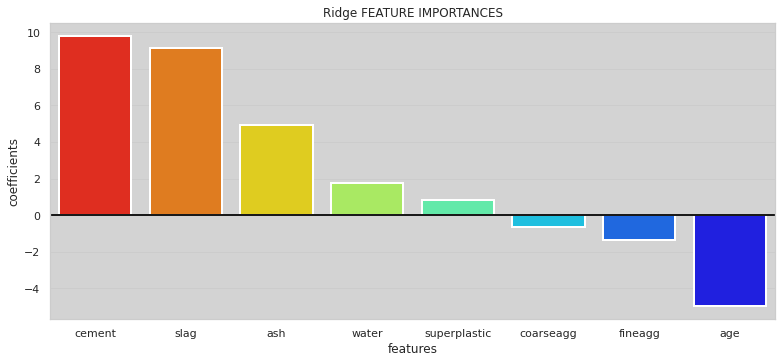

In [43]:
# Building a Ridge Regression model
rr = Ridge(random_state = 1)

# Train and Test the model
rr_resultsDf = train_test_model(rr, 'Ridge', X_train, X_test, y_train, y_test, 'coef', 2, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rr_resultsDf])
resultsDf

**Observation: This model performs better on training set as well as test set and RMSE is als reduced to 6.77**



<p style = "font-size:20px; color: #007580 "><strong> Lasso Regression </strong></p>

Lasso(random_state=1)
***************************************************************************
The intercept for our model is 35.74810810810809 

The coefficient for cement is 8.179556910616775
The coefficient for slag is 3.9520456863232596
The coefficient for ash is 0.0
The coefficient for water is -2.8418759293037152
The coefficient for superplastic is 2.50505203641483
The coefficient for coarseagg is -0.0
The coefficient for fineagg is -0.0
The coefficient for age is 8.689840506066409
***************************************************************************
[ 8.17955691  3.95204569  0.         -2.84187593  2.50505204 -0.
 -0.          8.68984051]


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
2,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032


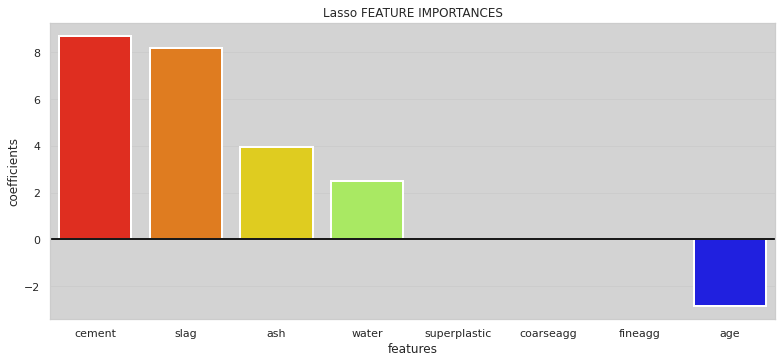

In [44]:
# Building a Lasso Regression model
lasso = Lasso(random_state = 1)

# Train and Test the model
lasso_resultsDf = train_test_model(lasso, 'Lasso', X_train, X_test, y_train, y_test, 'coef', 3, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf, lasso_resultsDf])
resultsDf

**Observation: This model performs better on training set and performance drops on test set which shows that it's an overfitting and very complex model.**

<p style = "font-size:20px; color: #007580 "><strong> Adding Interaction Terms - Linear Regression </strong></p>

In [45]:
# Transfom X_train and X_test to polynomial features
pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = 2, interaction_only=True))])
X_train_poly2 = pd.DataFrame(pipe.fit_transform(X_train))
X_test_poly2 = pd.DataFrame(pipe.fit_transform(X_test))

In [46]:
# Train and Test the model
lr_resultsDf = train_test_model(lr, 'Linear Regression with interaction features', X_train_poly2, X_test_poly2, y_train, y_test, 
                                'none', 4, 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_resultsDf])
resultsDf

LinearRegression()
***************************************************************************
***************************************************************************


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
2,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979


**After adding interaction terms we have 66 columns which includes original 8 columns and others which are created from original columns.**

**Notice that by adding interaction terms, RMSE decreased from 8.65 to 6.20**

**When we have more columns are less rows then we are likely to be in overfit zone because model coefficients is having high values. Hence let's try with non-regularized models.**

<p style = "font-size:20px; color: #007580 "><strong> Fit a simple non regularized linear model on interaction terms - Ridge Regression </strong></p>

Ridge(random_state=1)
***************************************************************************
The intercept for our model is 34.504078655829076 

The coefficient for 0 is 0.0
The coefficient for 1 is 11.174897361340689
The coefficient for 2 is 5.562348704609596
The coefficient for 3 is 2.165923070142611
The coefficient for 4 is -4.112230272136703
The coefficient for 5 is 1.3978110157604495
The coefficient for 6 is -0.7829305618161527
The coefficient for 7 is -0.07948627729093093
The coefficient for 8 is 10.230458115857923
The coefficient for 9 is -3.4931453278434317
The coefficient for 10 is -1.542481093176087
The coefficient for 11 is -0.9104156852814881
The coefficient for 12 is 0.7355920796593778
The coefficient for 13 is -0.4547036317166555
The coefficient for 14 is -0.29266659602694084
The coefficient for 15 is 0.35570975695906554
The coefficient for 16 is -2.992846939865346
The coefficient for 17 is 0.6893287250557273
The coefficient for 18 is 1.809707685044844
The coefficien

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
2,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728


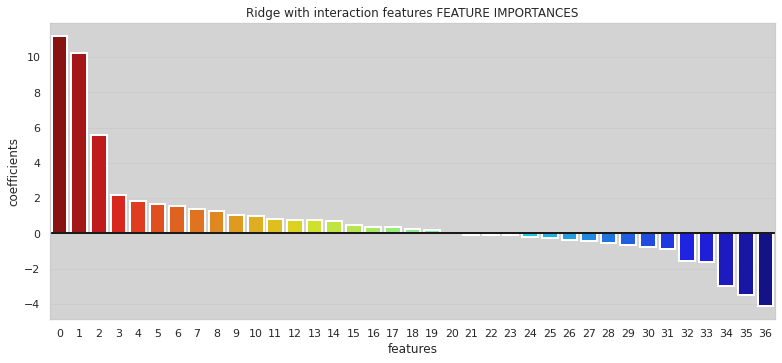

In [47]:
# Building a Ridge Regression model
rr = Ridge(random_state = 1)

# Train and Test the model
rr_resultsDf = train_test_model(rr, 'Ridge with interaction features', X_train_poly2, X_test_poly2, y_train, y_test, 'coef', 5, 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rr_resultsDf])
resultsDf

**Observation: Notice that test accuracy is better than Linear regression with interaction features. This model performs better on training set and performance drops on test set which shows that it's an overfitting and very complex model.**

<p style = "font-size:20px; color: #007580 "><strong> Fit a simple non regularized linear model on interaction terms - Lasso Regression </strong></p>

Lasso(random_state=1)
***************************************************************************
The intercept for our model is 36.1472355063866 

The coefficient for 0 is 0.0
The coefficient for 1 is 7.9845491880686605
The coefficient for 2 is 3.7299372243776894
The coefficient for 3 is 0.0
The coefficient for 4 is -2.8292606160205347
The coefficient for 5 is 2.2657332314856835
The coefficient for 6 is -0.0
The coefficient for 7 is -0.09518950820284522
The coefficient for 8 is 8.686943736836422
The coefficient for 9 is -0.0
The coefficient for 10 is -0.0
The coefficient for 11 is -0.0
The coefficient for 12 is 0.0
The coefficient for 13 is 0.0
The coefficient for 14 is -0.0
The coefficient for 15 is -0.0
The coefficient for 16 is -0.0
The coefficient for 17 is 0.0
The coefficient for 18 is 0.0
The coefficient for 19 is -0.0
The coefficient for 20 is 0.0
The coefficient for 21 is 0.0
The coefficient for 22 is 0.0
The coefficient for 23 is -0.6995556684791131
The coefficient for 24 is 

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
2,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728
6,Lasso with interaction features,0.7541395,7.5585812,0.7908939,0.7541395


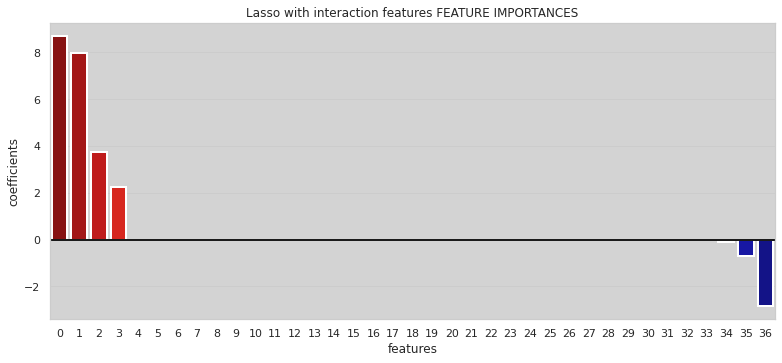

In [48]:
# Building a Lasso Regression model
lasso = Lasso(random_state = 1)

# Train and Test the model
lasso_resultsDf = train_test_model(lasso, 'Lasso with interaction features', X_train_poly2, X_test_poly2, y_train, y_test, 'coef', 6, 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf, lasso_resultsDf])
resultsDf

**Observation: This model performs better on training set and poorly on test set which shows that it's an overfitting and very complex model.**

<p style = "font-size:20px; color: #007580 "><strong> Polynomial Linear Regression </strong></p>

**Let's try polynomial model on the same data from 1 to 5 degree polynomial features**

In [49]:
for i in range(1,6):
    pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = i)), 
                 ('model', LinearRegression())])
    pipe.fit(X_train, y_train) # Fit the model on Training set
    prediction = pipe.predict(X_test) # Predict on Test set

    r2 = metrics.r2_score(y_test, prediction) # Calculate the r squared value on the Test set
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction)) # Root mean squared error
    
    print ("R-Squared for {0} degree polynomial is {1}".format(i, r2))
    print ("ROOT MEAN SQUARED ERROR for {0} degree polynomial features is {1}".format(i, rmse),"\n")

R-Squared for 1 degree polynomial is 0.8024959875485743
ROOT MEAN SQUARED ERROR for 1 degree polynomial features is 6.7746027958343875 

R-Squared for 2 degree polynomial is 0.8694832061015251
ROOT MEAN SQUARED ERROR for 2 degree polynomial features is 5.507177495416852 

R-Squared for 3 degree polynomial is 0.8396969000847162
ROOT MEAN SQUARED ERROR for 3 degree polynomial features is 6.103329767494355 

R-Squared for 4 degree polynomial is -29.58667764245721
ROOT MEAN SQUARED ERROR for 4 degree polynomial features is 84.3066880316714 

R-Squared for 5 degree polynomial is -3.533753229377792e+17
ROOT MEAN SQUARED ERROR for 5 degree polynomial features is 9061789815.228264 



**By looking at the above results, RMSE is start increasing from 1 degree polynomial which has 6.77 RMSE and RMSE came down to 5.50 for 2 degree polynomial features. Again from 3 degree polynomial RMSE is starts increasing hence optimal degree of polynomial is 2 degree polynomial.**

**Let's try 2-degree polynomial model on the same data**

In [50]:
pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = 2)), 
                 ('model', LinearRegression())])
    
pipe.fit(X_train, y_train) # Fit the model on Training set
prediction = pipe.predict(X_test) # Predict on Test set
        
r2 = metrics.r2_score(y_test, prediction) # Calculate the r squared value on the Test set
rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction)) # Root mean squared error

print ("R-Squared :", r2)
print ("ROOT MEAN SQUARED ERROR :", rmse)

# Accuracy of Training data set
print("Accuracy of Training data set: {0:.4f} %".format(pipe.score(X_train, y_train)))

# Accuracy of Test data set
accuracy_score = pipe.score(X_test, y_test)
print("Accuracy of Test data set: {0:.4f} %".format(accuracy_score))

R-Squared : 0.8694832061015251
ROOT MEAN SQUARED ERROR : 5.507177495416852
Accuracy of Training data set: 0.8807 %
Accuracy of Test data set: 0.8695 %


In [51]:
# Store the accuracy results for each model in a dataframe for final comparison
poly_resultsDf = pd.DataFrame({'Method': 'Linear Regression with Polynomial features', 'R Squared': r2, 'RMSE': rmse, 'Train Accuracy': pipe.score(X_train, y_train), 
                          'Test Accuracy': accuracy_score}, index=[7])
resultsDf = pd.concat([resultsDf, poly_resultsDf])
resultsDf

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
2,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728
6,Lasso with interaction features,0.7541395,7.5585812,0.7908939,0.7541395
7,Linear Regression with Polynomial features,0.8694832,5.5071775,0.8806901,0.8694832


**By looking at above results, 2-degree polynomial model is performs better on training set and even on test set with 1% difference which shows that it's like to be sweet spot. Henc let's try with non-regularized models.**

<p style = "font-size:20px; color: #007580 "><strong> Fit a simple non regularized linear model on polynomial features - Ridge Regression </strong></p>

In [52]:
# Transfom X_train and X_test to polynomial features
pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = 2))])
X_train_poly_2 = pd.DataFrame(pipe.fit_transform(X_train))
X_test_poly_2 = pd.DataFrame(pipe.fit_transform(X_test))

Ridge(random_state=1)
***************************************************************************
The intercept for our model is 22.726089926001904 

The coefficient for 0 is 0.0
The coefficient for 1 is 13.72814374251026
The coefficient for 2 is 8.12888778436314
The coefficient for 3 is 3.868507831678563
The coefficient for 4 is -3.2680565200743548
The coefficient for 5 is -0.11176046516032678
The coefficient for 6 is 0.6319814334118257
The coefficient for 7 is 1.7853973044894058
The coefficient for 8 is 9.920907417485342
The coefficient for 9 is 0.1981195961822099
The coefficient for 10 is -2.371686869367413
The coefficient for 11 is -0.7447509492529851
The coefficient for 12 is -3.123492455873551
The coefficient for 13 is -0.7841786534023579
The coefficient for 14 is -1.558934321502161
The coefficient for 15 is -1.759865351570303
The coefficient for 16 is 0.6208537677419277
The coefficient for 17 is 8.684180730485924
The coefficient for 18 is -1.1965107850065932
The coefficient for 

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
2,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728
6,Lasso with interaction features,0.7541395,7.5585812,0.7908939,0.7541395
7,Linear Regression with Polynomial features,0.8694832,5.5071775,0.8806901,0.8694832
8,Ridge with polynomial features,0.8448948,6.0035637,0.8804418,0.8448948


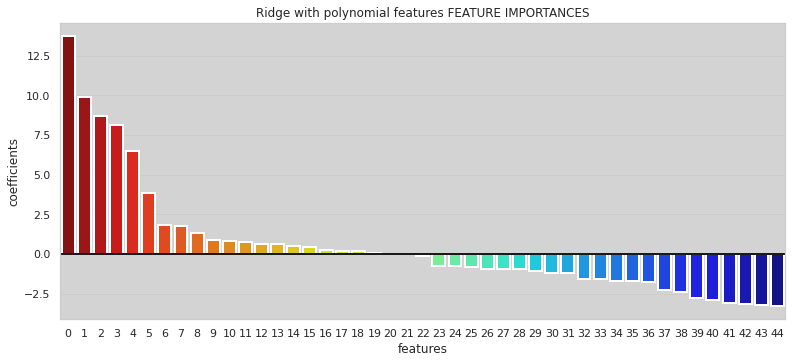

In [53]:
# Building a Ridge Regression model
rr = Ridge(random_state = 1)

# Train and Test the model
rr_resultsDf = train_test_model(rr, 'Ridge with polynomial features', X_train_poly_2, X_test_poly_2, y_train, y_test, 'coef', 8, 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rr_resultsDf])
resultsDf

**Observation: This model performs better on training set and poorly on test set which shows that it's an overfitting and very complex model.**

<p style = "font-size:20px; color: #007580 "><strong> Fit a simple non regularized linear model on polynomial features - Lasso Regression </strong></p>

Lasso(random_state=1)
***************************************************************************
The intercept for our model is 36.716262241519395 

The coefficient for 0 is 0.0
The coefficient for 1 is 8.07284239342562
The coefficient for 2 is 3.7446158431586403
The coefficient for 3 is 0.0
The coefficient for 4 is -2.830470634919525
The coefficient for 5 is 2.073862667031099
The coefficient for 6 is -0.0
The coefficient for 7 is -0.03884259221877623
The coefficient for 8 is 8.661997775229512
The coefficient for 9 is 0.0
The coefficient for 10 is -0.0
The coefficient for 11 is -0.0
The coefficient for 12 is -0.0
The coefficient for 13 is 0.0
The coefficient for 14 is 0.0
The coefficient for 15 is -0.0
The coefficient for 16 is -0.0
The coefficient for 17 is 0.0
The coefficient for 18 is -0.0
The coefficient for 19 is 0.0
The coefficient for 20 is 0.0
The coefficient for 21 is -0.0
The coefficient for 22 is 0.0
The coefficient for 23 is 0.0
The coefficient for 24 is 0.0
The coefficien

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
2,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728
6,Lasso with interaction features,0.7541395,7.5585812,0.7908939,0.7541395
7,Linear Regression with Polynomial features,0.8694832,5.5071775,0.8806901,0.8694832
8,Ridge with polynomial features,0.8448948,6.0035637,0.8804418,0.8448948
9,Lasso with polynomial features,0.7586617,7.4887444,0.7950318,0.7586617


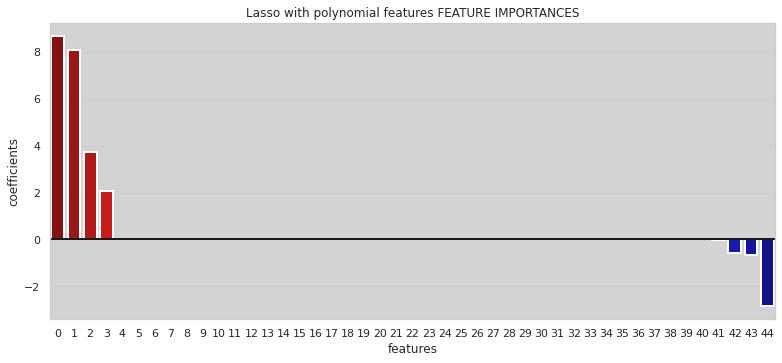

In [54]:
# Building a Lasso Regression model
lasso = Lasso(random_state = 1)

# Train and Test the model
lasso_resultsDf = train_test_model(lasso, 'Lasso with polynomial features', X_train_poly_2, X_test_poly_2, y_train, y_test, 'coef', 9, 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf, lasso_resultsDf])
resultsDf

**Observation: This model performs better on training set and poorly on test set which shows that it's an overfitting and very complex model.**

<a id = '7.3'></a>
<p style = "font-size:20px; color: #007580 "><strong> 7.3 Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and presenting my findings in terms of the independent attributes and their suitability to predict strength </strong></p> 

<p style = "font-size:20px; color: #007580 "><strong> K Means Clustering </strong></p>

In [55]:
# Scale the data using PowerTransformer
scale = PowerTransformer()
concrete_df_scaled = pd.DataFrame(scale.fit_transform(concrete_df))

In [56]:
cluster_range = range(1, 15)  
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters = num_clusters, n_init = 5, random_state = 1)
    clusters.fit(concrete_df_scaled)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_ )

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9045.0000000
1,2,7184.2057855
2,3,6171.5046087
3,4,5406.3104852
4,5,4917.0507719
5,6,4449.1454552
6,7,4089.5535304
7,8,3825.9242642
8,9,3630.4446285
9,10,3526.1713798


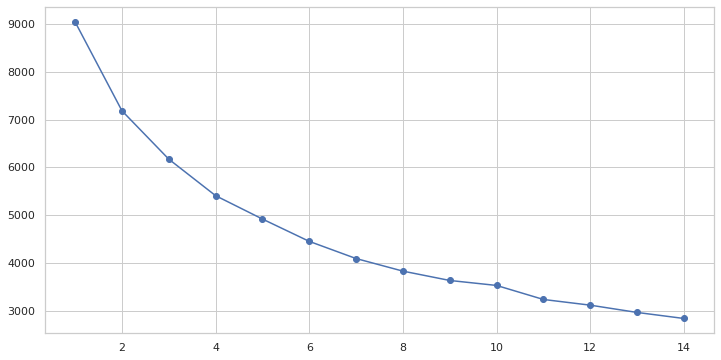

In [57]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [58]:
# k = 6
cluster = KMeans(n_clusters = 6, random_state = 1)
cluster.fit(concrete_df_scaled)

KMeans(n_clusters=6, random_state=1)

In [59]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_df_scaled)
concrete_df_scaled["GROUP"] = prediction

In [60]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.01540893,  0.64108139, -0.41259592, -0.97356604,  0.98008716,
        -0.57991469,  0.14760417, -0.08494664,  1.09319782],
       [ 0.76082127,  0.27816954, -0.87757638,  1.54832179, -1.14902254,
        -0.04235032, -1.58810862,  1.14579238,  0.77515871],
       [-1.03674194,  1.12842068, -0.91230705,  0.4592532 , -0.88284638,
         0.03252593, -0.01337835, -0.36105052, -0.77439284],
       [-0.49788956, -0.70084416,  1.08010433, -0.6455165 ,  0.6166365 ,
         0.6187428 ,  0.47157378,  0.01551861, -0.15664726],
       [-0.53189637,  0.50905562,  1.02219215,  0.43608761,  0.62840773,
        -1.00781291, -0.33696493, -0.01156446, -0.08081618],
       [ 0.61302543, -1.03762913, -0.92298759,  0.40787035, -1.1613292 ,
         0.55761958,  0.22169431, -0.18034126, -0.5277424 ]])

In [61]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df))
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.0154089,0.6410814,-0.4125959,-0.9735660,0.9800872,-0.5799147,0.1476042,-0.0849466,1.0931978
1,0.7608213,0.2781695,-0.8775764,1.5483218,-1.1490225,-0.0423503,-1.5881086,1.1457924,0.7751587
2,-1.0367419,1.1284207,-0.9123071,0.4592532,-0.8828464,0.0325259,-0.0133783,-0.3610505,-0.7743928
3,-0.4978896,-0.7008442,1.0801043,-0.6455165,0.6166365,0.6187428,0.4715738,0.0155186,-0.1566473
4,-0.5318964,0.5090556,1.0221921,0.4360876,0.6284077,-1.0078129,-0.3369649,-0.0115645,-0.0808162
5,0.6130254,-1.0376291,-0.9229876,0.4078704,-1.1613292,0.5576196,0.2216943,-0.1803413,-0.5277424


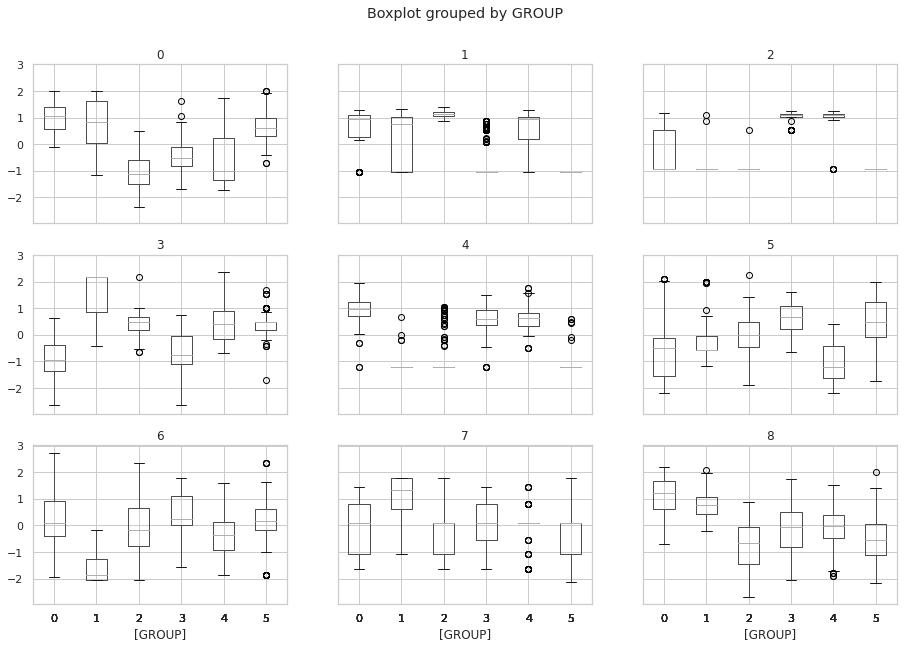

In [62]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
concrete_df_scaled.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10));

* Here, None of the dimensions are good predictor of target variable.
* For all the dimensions (variables) every cluster have a similar range of values except in one case.
* We can see that the body of the cluster are overlapping.
* So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

<p style = "font-size:20px; color: #007580 "><strong> KNN Regressor </strong></p>

#### Transform original data

In [63]:
def train_test_transform(X_train, X_test):
    scale = PowerTransformer()
    
    X_train_scaled = pd.DataFrame(scale.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scale.fit_transform(X_test))
    
    return X_train_scaled, X_test_scaled

In [64]:
# empty list that will hold error
error = []

X_train_scaled, X_test_scaled = train_test_transform(X_train, X_test)

# perform error metrics for values from 1,2,3....29
for k in range(1,30):
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    error.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Mean error')

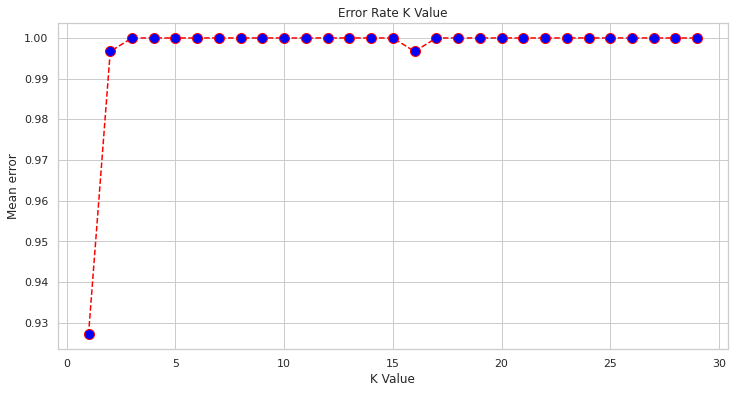

In [65]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

#### Optimal value of K is 2

In [66]:
# Building a KNN Regression model
knn = KNeighborsRegressor(n_neighbors = 2)

# Train and Test the model
knn_resultsDf = train_test_model(knn, 'KNeighborsRegressor', X_train, X_test, y_train, y_test, 'none', 10, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf, knn_resultsDf])
resultsDf

KNeighborsRegressor(n_neighbors=2)
***************************************************************************
***************************************************************************


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
2,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728
6,Lasso with interaction features,0.7541395,7.5585812,0.7908939,0.7541395
7,Linear Regression with Polynomial features,0.8694832,5.5071775,0.8806901,0.8694832
8,Ridge with polynomial features,0.8448948,6.0035637,0.8804418,0.8448948
9,Lasso with polynomial features,0.7586617,7.4887444,0.7950318,0.7586617
10,KNeighborsRegressor,0.8144620,6.5661735,0.9561720,0.8144620


**Observation: This model performs better on training set and poorly on test set which shows that it's an overfitting and very complex model.**

<p style = "font-size:20px; color: #007580 "><strong> Build SupportVectorRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, CatBoostRegressor and XGBRegressor models </strong></p>

SVR(kernel='linear')
***************************************************************************
The intercept for our model is [35.44003975] 

The coefficient for cement is 9.038129786129197
The coefficient for slag is 4.815082811376525
The coefficient for ash is 0.9465257960212494
The coefficient for water is -4.027464394686201
The coefficient for superplastic is 2.2625415411445897
The coefficient for coarseagg is -0.5332218096428389
The coefficient for fineagg is -1.1101549120147522
The coefficient for age is 9.820178903093227
***************************************************************************
[[ 9.03812979  4.81508281  0.9465258  -4.02746439  2.26254154 -0.53322181
  -1.11015491  9.8201789 ]]
DecisionTreeRegressor(random_state=1)
***************************************************************************
***************************************************************************
RandomForestRegressor(random_state=1)
**********************************************************

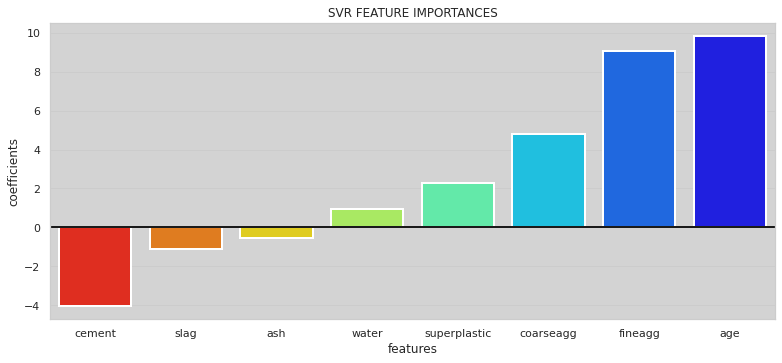

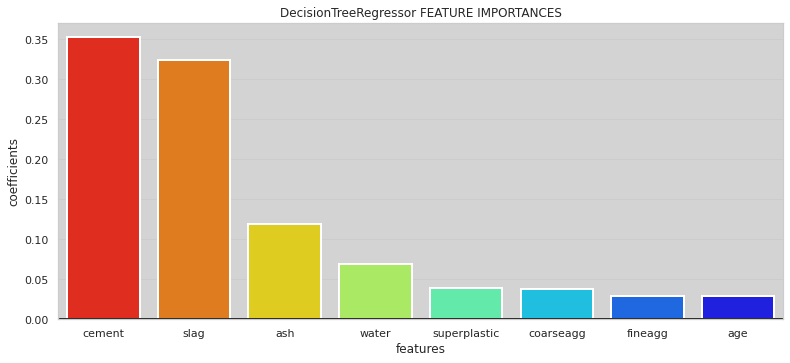

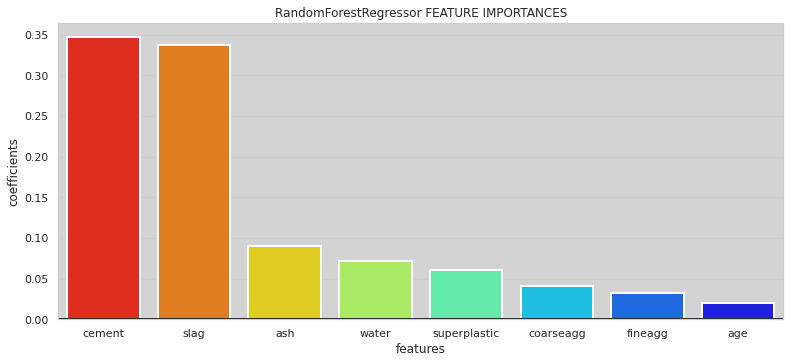

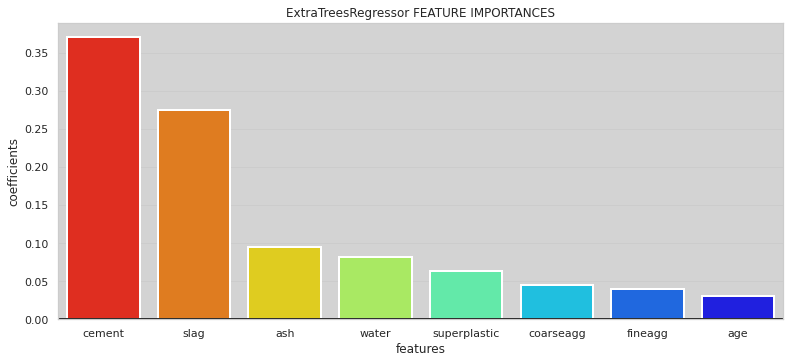

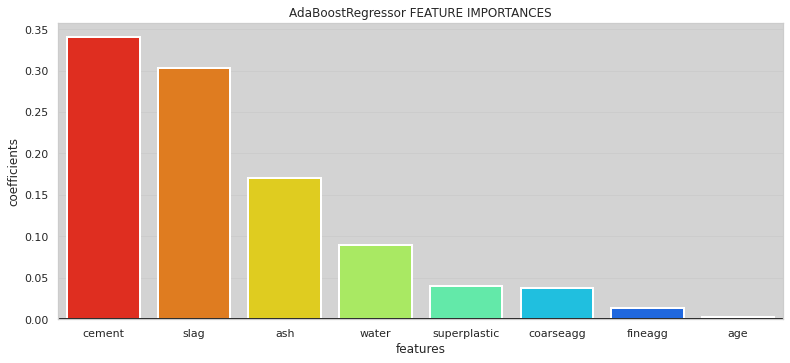

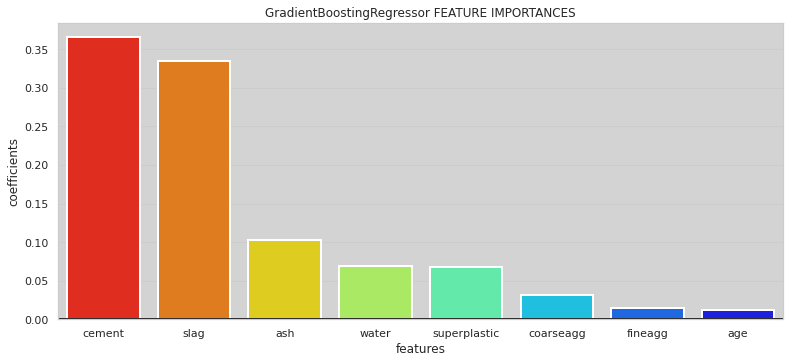

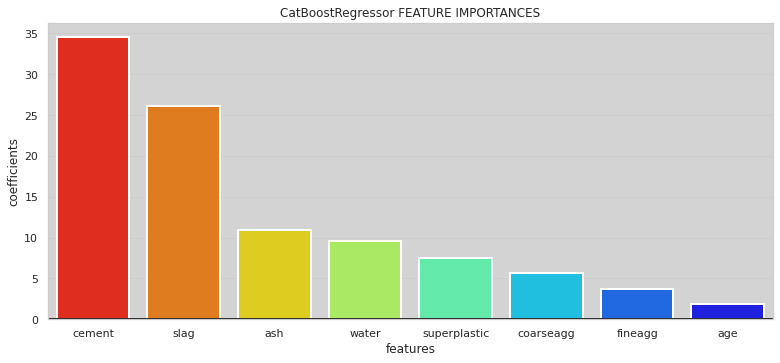

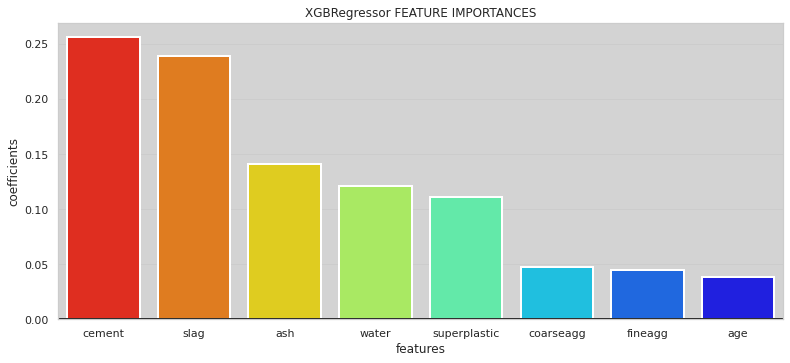

In [67]:
# define regressor models
models=[
    ['SVR',SVR(kernel='linear')],
    ['DecisionTreeRegressor', DecisionTreeRegressor(random_state = 1)],
    ['RandomForestRegressor',RandomForestRegressor(random_state = 1)],
    ['BaggingRegressor',BaggingRegressor(random_state = 1)],
    ['ExtraTreesRegressor',ExtraTreesRegressor(random_state = 1)],
    ['AdaBoostRegressor',AdaBoostRegressor(random_state = 1)],
    ['GradientBoostingRegressor',GradientBoostingRegressor(random_state = 1)],
    ['CatBoostRegressor',CatBoostRegressor(random_state = 1, verbose=False)],
    ['XGBRegressor',XGBRegressor()]
]


i = 11
for name, regressor in models:
    if name == 'SVR':
        # Train and Test the model
        svr_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'coef', i, 'yes')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf = pd.concat([resultsDf, svr_resultsDf])
    elif name == 'BaggingRegressor':
        # Train and Test the model
        bag_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'none', i, 'yes')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf = pd.concat([resultsDf, bag_resultsDf])
    else:
        # Train and Test the model
        ensemble_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'feat', i, 'yes')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf = pd.concat([resultsDf, ensemble_resultsDf])
    i = i+1

#### By looking at above feature importnce from ensemble models:
**Cement, Slag, Ash, Water, Superplastic, Coarsegg and fineagg are top important features**

In [68]:
# Show results dataframe
resultsDf

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
2,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728
6,Lasso with interaction features,0.7541395,7.5585812,0.7908939,0.7541395
7,Linear Regression with Polynomial features,0.8694832,5.5071775,0.8806901,0.8694832
8,Ridge with polynomial features,0.8448948,6.0035637,0.8804418,0.8448948
9,Lasso with polynomial features,0.7586617,7.4887444,0.7950318,0.7586617
10,KNeighborsRegressor,0.8144620,6.5661735,0.9561720,0.8144620


<a id = '7.4'></a>
<p style = "font-size:20px; color: #007580 "><strong> 7.4 Overall Summary - Before feature selection </strong></p>

I am able to predict the Concrete compressive strength using few ingradients with below details.

Refer the above table:

1. I have tried with simple linear regression which is overfit model hence I moved on to non-regularized models.

    a. Ridge performs better on both training and test set.

    b. Lasso performs better on training set and poorly on test set.
2. As mentioned in Multi-variate analysis, there is some interaction between independent features hence I have tried with simple linear regression and non-regularized models (Ridge and Lasso) and all of them turned out to be overfit models.

3. As mentioned in Multi-variate analysis, there are some non-linear(curvy-linear) relatioship within independent features as well as with target variable hence I have tried with polynomial features.

    a. Simple linear regression with polynomial features with degree = 2 performs better on both training and test set with 1% difference.

    b. Ridge and Lasso with polynomial features turned out to be overfit models.

4. I have tried with Support Vector Regressor and it performs better on both training and test set.

5. I have tried with KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, CatBoostRegressor and XGBRegressor models, sad news is all these models turned out to be overfit models.

6. Best models are as follows:

    a. Linear Regression with Polynomial features - Test accuracy = 86.94% with RMSE = 5.50

    b. Ridge regression with original features - Test accuracy = 80.24% with RMSE = 6.77

    c. SVR with original features - Test accuracy = 80.03% with RMSE = 6.81

<a id = '8.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 8. Feature Selection Methods </h2> 

<a id = '8.1'></a>
<p style = "font-size:20px; color: #007580 "><strong> 8.1 Feature Importance </strong></p> 

<p style = "font-size:20px; color: #007580 "><strong> Lasso with it's important features </strong></p> 

In [69]:
# Selecting features using Lasso regularisation using SelectFromModel
sel_ = SelectFromModel(Lasso(random_state = 1))
sel_.fit(X_train, y_train)

# Visualising features that were kept by the lasso regularisation
sel_.get_support()

# Make a list of with the selected features
lasso_selected_feat = X_train.columns[(sel_.get_support())]

# Prepare train and test data
X_train_lasso = X_train[lasso_selected_feat]
X_test_lasso = X_test[lasso_selected_feat]

# Lasso with it's important features
X_train_lasso.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

<p style = "font-size:20px; color: #007580 "><strong> All models - Lasso with it's important features </strong></p> 

In [70]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_lasso, X_test_lasso, y_train, y_test, 'no')

LinearRegression()
***************************************************************************
***************************************************************************
Ridge(random_state=1)
***************************************************************************
***************************************************************************
Lasso(random_state=1)
***************************************************************************
***************************************************************************
KNeighborsRegressor(n_neighbors=3)
***************************************************************************
***************************************************************************
SVR(kernel='linear')
***************************************************************************
***************************************************************************
RandomForestRegressor(random_state=1)
***************************************************************************
*******

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
2,Ridge,0.6773100,8.6594165,0.7351817,0.6773100
3,Lasso,0.6777624,8.6533448,0.7349403,0.6777624
4,KNeighborsRegressor,0.6107916,9.5101417,0.8554561,0.6107916
5,SVR,0.6751260,8.6886709,0.7308535,0.6751260
6,RandomForestRegressor,0.8923480,5.0015774,0.9835057,0.8923480
7,BaggingRegressor,0.8836412,5.1999061,0.9783562,0.8836412
8,ExtraTreesRegressor,0.8777015,5.3309730,0.9956299,0.8777015
9,AdaBoostRegressor,0.7672478,7.3543238,0.8147938,0.7672478
10,GradientBoostingRegressor,0.8976743,4.8762762,0.9465801,0.8976743


**Lasso with it's important features - observation: All these models performs better on training set and poorly on test set which shows that it's an overfitting and very complex models.**

<p style = "font-size:20px; color: #007580 "><strong> Lasso with it's polynomial important features </strong></p>

In [71]:
# Selecting features using Lasso regularisation using SelectFromModel
sel_ = SelectFromModel(Lasso(random_state = 1))
sel_.fit(X_train_poly_2, y_train)

# Visualising features that were kept by the lasso regularisation
sel_.get_support()

# Make a list of with the selected features
lasso_poly_selected_feat = X_train_poly_2.columns[(sel_.get_support())]

# Prepare train and test data
X_train_lasso_poly = X_train_poly_2[lasso_poly_selected_feat]
X_test_lasso_poly = X_test_poly_2[lasso_poly_selected_feat]

# Lasso with it's polynomial important features
X_train_lasso_poly.columns

Int64Index([1, 2, 4, 5, 7, 8, 26, 44], dtype='int64')

<p style = "font-size:20px; color: #007580 "><strong> All models - Lasso with it's polynomial important features </strong></p>

In [72]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_lasso_poly, X_test_lasso_poly, y_train, y_test, 'no')

LinearRegression()
***************************************************************************
***************************************************************************
Ridge(random_state=1)
***************************************************************************
***************************************************************************
Lasso(random_state=1)
***************************************************************************
***************************************************************************
KNeighborsRegressor(n_neighbors=3)
***************************************************************************
***************************************************************************
SVR(kernel='linear')
***************************************************************************
***************************************************************************
RandomForestRegressor(random_state=1)
***************************************************************************
*******

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.7902467,6.9815251,0.8177938,0.7902467
2,Ridge,0.7902424,6.9815957,0.8177917,0.7902424
3,Lasso,0.7586654,7.4886871,0.7950330,0.7586654
4,KNeighborsRegressor,0.8353518,6.1854941,0.9330460,0.8353518
5,SVR,0.7895018,6.9939109,0.8139128,0.7895018
6,RandomForestRegressor,0.8492874,5.9179407,0.9834706,0.8492874
7,BaggingRegressor,0.8412921,6.0728860,0.9775440,0.8412921
8,ExtraTreesRegressor,0.8435833,6.0288905,0.9956299,0.8435833
9,AdaBoostRegressor,0.7343021,7.8576006,0.8236686,0.7343021
10,GradientBoostingRegressor,0.8416547,6.0659453,0.9476107,0.8416547


**Lasso with it's polynomial important features - observation: All these models performs better on training set and poorly on test set which shows that it's an overfitting and very complex models.**

<p style = "font-size:20px; color: #007580 "><strong> Importance features from ensemble models - DecisionTree, ExtraTree, AdaBoost, GradientBoost, CatBoost and XGBoost </strong></p>

**As mentioned in earlier steps, top 5 important features from ensemble models are - cement, slag, ash, water and superplastic**

In [73]:
# Select top 5 important features
X_feat = concrete_df[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'age']]
y = concrete_df['strength']

# Split data into train and test set
X_train_feat, X_test_feat, y_train, y_test = train_test_split(X_feat, y, test_size = 0.30, random_state = 1)

<p style = "font-size:20px; color: #007580 "><strong> All models with ensemble's important features </strong></p>

In [74]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_feat, X_test_feat, y_train, y_test, 'yes')

LinearRegression()
***************************************************************************
***************************************************************************
Ridge(random_state=1)
***************************************************************************
***************************************************************************
Lasso(random_state=1)
***************************************************************************
***************************************************************************
KNeighborsRegressor(n_neighbors=3)
***************************************************************************
***************************************************************************
SVR(kernel='linear')
***************************************************************************
***************************************************************************
RandomForestRegressor(random_state=1)
***************************************************************************
*******

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.7950930,6.9004005,0.8098282,0.7950930
2,Ridge,0.7949743,6.9023980,0.8098251,0.7949743
3,Lasso,0.7668033,7.3613434,0.7894170,0.7668033
4,KNeighborsRegressor,0.8141015,6.5725493,0.9313649,0.8141015
5,SVR,0.7934241,6.9284444,0.8066399,0.7934241
6,RandomForestRegressor,0.8834453,5.2042804,0.9836432,0.8834453
7,BaggingRegressor,0.8701151,5.4938288,0.9777511,0.8701151
8,ExtraTreesRegressor,0.8722839,5.4477693,0.9956299,0.8722839
9,AdaBoostRegressor,0.7635091,7.4131554,0.8152200,0.7635091
10,GradientBoostingRegressor,0.8883289,5.0940869,0.9414138,0.8883289


**All models with ensemble's important features - observation:**

1. Linear regression - Test accuracy = 79.50% with RMSE = 6.90
2. Ridge regression - Test accuracy = 79.49% with RMSE = 6.90
3. SVR - Test accuracy = 79.34% with RMSE = 6.92

Rest all models performs better on training set and poorly on test set which shows that it's an overfitting and very complex models.

<a id = '8.2'></a>
<p style = "font-size:20px; color: #007580 "><strong> 8.2 Overall summary - after feature selection </strong></p>

I am able to predict the concrete compressive strength using few ingradients with below details.

I have tried three different feature importance methods and please find the below results.

1. Lasso with it's important features are as follows:
 ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']

 I have built all models with above features and all of them performs better on training set and poorly on test set which shows that it's an overfitting and very complex models.

2. Lasso with it's polynomial important features are as follows:
 [1, 2, 4, 5, 7, 8, 26, 44]

 I have built all models with above features and all of them performs better on training set and poorly on test set which shows that it's an overfitting and very complex models.

3. All models with ensemble's important features
 ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'age']

 I have built all models with above features and all of them performs better on training set and poorly on test set except below models which shows that it's an overfitting and very complex models.

    a. Linear regression - Test accuracy = 79.50% with RMSE = 6.90

    b. Ridge regression - Test accuracy = 79.49% with RMSE = 6.90

    c. SVR - Test accuracy = 79.34% with RMSE = 6.92

<a id = '8.3'></a>
<p style = "font-size:20px; color: #007580 "><strong> 8.3 Comparison of with and without feature selection methods </strong></p>

1. Best models without feature selection methods:

    a. Linear Regression with Polynomial features - Test accuracy = 86.94% with RMSE = 5.50

    b. Ridge regression with original features - Test accuracy = 80.24% with RMSE = 6.77

    c. SVR with original features - Test accuracy = 80.03% with RMSE = 6.81


2. Best models with ensemble's feature selection methods:

    a. Linear regression - Test accuracy = 79.50% with RMSE = 6.90

    b. Ridge regression - Test accuracy = 79.49% with RMSE = 6.90

    c. SVR - Test accuracy = 79.34% with RMSE = 6.92

**By comparing both options, I see the best models which suits this project are from without feature selection methods, I mean with original features.**

<a id = '9.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 9. Optimization </h2> 

**As mentioned in above comparisons, we can hypertune the parameters for Ridge and Support Vector Regressor algorithms.**

<a id = '9.1'></a>
<p style = "font-size:20px; color: #007580 "><strong> 9.1 Hyper Parameter Tuning </strong></p>

<p style = "font-size:20px; color: #007580 "><strong> Ridge and SVR models - Hyperparameter tuning with original features </strong></p>

In [75]:
# define regressor models
models=[['Ridge',Ridge()],
    #['Lasso',Lasso()],
    #['KNeighborsRegressor',KNeighborsRegressor()],
    ['SVR',SVR()]
    #['RandomForestRegressor',RandomForestRegressor()],
    #['BaggingRegressor',BaggingRegressor()],
    #['ExtraTreesRegressor',ExtraTreesRegressor()],
    #['AdaBoostRegressor',AdaBoostRegressor()],
    #['GradientBoostingRegressor',GradientBoostingRegressor()],
    #['CatBoostRegressor',CatBoostRegressor(verbose=False)],
    #['XGBRegressor',XGBRegressor()]
]

# define model parameters
ridge_param_grid = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}
lasso_param_grid = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
knn_param_grid = {'n_neighbors': range(3, 21, 2),
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan', 'minkowski']}
svr_param_grid = {'kernel': ['poly', 'rbf', 'sigmoid'],
                 'C': [50, 10, 1.0, 0.1, 0.01],
                 'gamma': ['scale']}
rf_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_features': ['auto', 'sqrt', 'log2']}
bag_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_samples': np.arange(0.7, 0.8, 0.05)}
et_param_grid = {'n_estimators': np.arange(10,100,10),
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_split': np.arange(2,15,1)}
adb_param_grid = {'n_estimators': np.arange(30,100,10),
                 'learning_rate': np.arange(0.1,1,0.5)}
gb_param_grid = {'n_estimators': np.arange(30,100,10),
                 'learning_rate': np.arange(0.1,1,0.5)}
catb_param_grid = {'depth': [4, 7, 10],
                  'learning_rate' : [0.03, 0.1, 0.15],
                  'l2_leaf_reg': [1,4,9],
                  'iterations': [300]}
xgb_param_grid = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                  'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
                  'min_child_weight': [ 1, 3, 5, 7],
                  'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
                  'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7]}


for name, regressor in models:
    if name == 'Ridge':
        ridge_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, ridge_param_grid)
    elif name == 'Lasso':
        lasso_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, lasso_param_grid)
    elif name == 'KNeighborsRegressor':
        knn_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, knn_param_grid)
    elif name == 'SVR':
        svr_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, svr_param_grid)
    elif name == 'RandomForestRegressor':
        rf_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, rf_param_grid)
    elif name == 'BaggingRegressor':
        bag_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, bag_param_grid)
    elif name == 'ExtraTreesRegressor':
        et_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, et_param_grid)
    elif name == 'AdaBoostRegressor':
        adb_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, adb_param_grid)
    elif name == 'GradientBoostingRegressor':
        gb_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, gb_param_grid)
    elif name == 'CatBoostRegressor':
        catb_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, catb_param_grid)
    elif name == 'XGBRegressor':
        xgb_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, xgb_param_grid)

Ridge - Least: RMSE 8.620614 using {'alpha': 1}
Total duration 2.821542501449585 

SVR - Least: RMSE 8.342924 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
Total duration 2.345750570297241 



<p style = "font-size:20px; color: #007580 "><strong> Ridge and SVR models with Hyperparameters </strong></p>

In [76]:
# define regressor models
models=[['Ridge', ridge_best_estimator],
    #['Lasso', lasso_best_estimator],
    #['KNeighborsRegressor', knn_best_estimator],
    ['SVR', svr_best_estimator],
    #['RandomForestRegressor', rf_best_estimator],
    #['BaggingRegressor', bag_best_estimator],
    #['ExtraTreesRegressor',et_best_estimator],
    #['AdaBoostRegressor', adb_best_estimator],
    #['GradientBoostingRegressor', gb_best_estimator],
    #['CatBoostRegressor', catb_best_estimator],
    #['XGBRegressor', xgb_best_estimator]
]

resultsDf_hp = pd.DataFrame()
i = 1
for name, regressor in models:
    # Train and Test the model
    resultsDf_hp_ind = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'none', i, 'yes')

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf_hp = pd.concat([resultsDf_hp, resultsDf_hp_ind])
    i = i+1

# Show results dataframe
resultsDf_hp

Ridge(alpha=1)
***************************************************************************
***************************************************************************
SVR(C=50, kernel='poly')
***************************************************************************
***************************************************************************


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
2,SVR,0.8197896,6.4712141,0.8835858,0.8197896


<a id = '9.2'></a>
<p style = "font-size:20px; color: #007580 "><strong> 9.2 Bootstrap Sampling - Model performance range at 95% confidence level</strong></p>

In [77]:
# Drop K-means cluster group from concrete_df_scaled dataset
concrete_df_scaled.drop(columns=['GROUP'], axis=1, inplace=True)

<p style = "font-size:20px; color: #007580 "><strong> GradientBoostingRegressor</strong></p>

In [78]:
values = concrete_df_scaled.values

# Number of bootstrap samples to create
n_iterations = 1000        

# size of a bootstrap sample
n_size = int(len(concrete_df_scaled) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
gbm_stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)

    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 

    # Take the target column for all rows in test set
    y_bs_test = test[:,-1]  

    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_bs_test)
    predictions = gbmTree.predict(test[:, :-1])  

    gbm_stats.append(score)

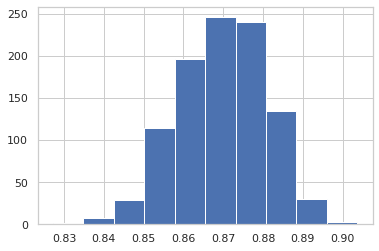

95.0 confidence interval 84.7% and 89.0%


In [79]:
# plot scores
plt.hist(gbm_stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(gbm_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(gbm_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

<p style = "font-size:20px; color: #007580 "><strong> RandomForestRegressor </strong></p>

In [80]:
values = concrete_df_scaled.values

# Number of bootstrap samples to create
n_iterations = 1000        

# size of a bootstrap sample
n_size = int(len(concrete_df_scaled) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
rf_stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)

    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 

    # Take the target column for all rows in test set
    y_bs_test = test[:,-1]  

    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_bs_test)
    predictions = rfTree.predict(test[:, :-1]) 

    rf_stats.append(score)

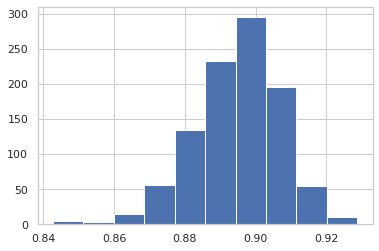

95.0 confidence interval 87.0% and 91.7%


In [81]:
# plot scores
plt.hist(rf_stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(rf_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(rf_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

<a id = '10.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 10. Conclusion </h2> 

1. I am able to predict the concrete compressive strength using original features with an accuracy of 86.94% on test data with RMSE = 5.50

2. If we look at the above results from various methods then we got the best accuracy from original features and followed below steps to gain that much of accuracy.

    a. As mentioned in Multi-variate analysis, there are some non-linear(curvy-linear) relatioship within independent features as well as with target variable hence I have tried with polynomial features.

    b. Simple linear regression with polynomial features with degree = 2 performs better on both training and test set with 1% difference.

3. We had 25 duplicate instances in dataset and dropped those duplicates.

4. We had outliers in 'Water', 'Superplastic', 'Fineagg', 'Age' and 'Strength' column also, handled these outliers by replacing every outlier with upper and lower side of the whisker.

5. Except 'Cement', 'Water', 'Superplastic' and 'Age' features, all other features are having very weak relationship with concrete 'Strength' feature and does not account for making statistical decision (of correlation).

6. Range of clusters in this dataset is 2 to 6

7. No missing values in dataset.

8. Standardization of data using PowerTransformer improves accuracy slightly.

9. Bootstrap sampling with GradientBoostingRegressor model performance is between 84.8% - 89.0% is better than other Regression algorithms.

10. Bootstrap sampling with RandomForestRegressor model performance is between 86.8% - 91.6% is better than other Regression algorithms.

11. **Finally Bootstrap sampling with RandomForestRegressor model with an accuracy of 86.6% - 91.6% is our best model.**

<p style = "font-size:30px; color: #007580 "><strong> Thanks for reading.</strong></p>